In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skewnorm as sn
import scipy.special as sp
import seaborn as sns
from seaborn import kdeplot
from sklearn.neighbors import KernelDensity
plt.rc('font', size=12.0)

In [2]:
nsrc = ['6304', '6397', 'M13', 'M28', 'M30', 'wCen', 'X7', '1810b', '1724b', '1702', '0030', '0740']
pstr = ['J0453p','J0453c','J1906p','J1906c','B1534p',  'B1534c','B1913p','B1913c',
      'B2127p','B2127c','J0737A','J0737B','J1756p',  'J1756c','J1807p','J1807c',
      'J1518p','J1518c','J1811p','J1811c','J1829p',  'J1829c','J2045', 'J2053',
      'J1713', 'B1855', 'J0751', 'J1141', 'J1738',   'J1614', 'J0348', 'J2222', 'J2234',
      'J1949', 'J1012', 'J0437', 'J1909', 'J1802',   'J1911', 'J2043', 'J0337', 'J1946',
      'J1918', 'J1600', 'J0621', 'B2303', 'J0024',   'J0514', 'B1516', 'J1748I','J1748J',
      'B1802', 'B1911', 'J0740', 'CygX2', 'XTEJ2123','4U1822','HerX1', '2S0921']

m_nsp, r_nsp, m_src, r_src = [], [], [], []

for k, star in enumerate(nsrc):
    m_src.append('Mns_'+nsrc[k])
for k, star in enumerate(nsrc):
    r_src.append('Rns_'+nsrc[k])
for k, star in enumerate(pstr):
    m_nsp.append('M_'+pstr[k])

## ML: $M-R$ Curves

In [3]:
mchain = h5py.File('files/main_MP.o2','r')['markov_chain_0']
mult = np.array(mchain['data']['mult'])

R_0  = np.array(mchain['data']['R_0']);  R_0  = R_0[np.nonzero(R_0)];
R_1  = np.array(mchain['data']['R_1']);  R_1  = R_1[np.nonzero(R_1)];
R_2  = np.array(mchain['data']['R_2']);  R_2  = R_2[np.nonzero(R_2)];
R_3  = np.array(mchain['data']['R_3']);  R_3  = R_3[np.nonzero(R_3)];
R_4  = np.array(mchain['data']['R_4']);  R_4  = R_4[np.nonzero(R_4)];
R_5  = np.array(mchain['data']['R_5']);  R_5  = R_5[np.nonzero(R_5)];
R_6  = np.array(mchain['data']['R_6']);  R_6  = R_6[np.nonzero(R_6)];
R_7  = np.array(mchain['data']['R_7']);  R_7  = R_7[np.nonzero(R_7)];
R_8  = np.array(mchain['data']['R_8']);  R_8  = R_8[np.nonzero(R_8)];
R_9  = np.array(mchain['data']['R_9']);  R_9  = R_9[np.nonzero(R_9)];
R_10 = np.array(mchain['data']['R_10']); R_10 = R_10[np.nonzero(R_10)];
R_11 = np.array(mchain['data']['R_11']); R_11 = R_11[np.nonzero(R_11)];
R_12 = np.array(mchain['data']['R_12']); R_12 = R_12[np.nonzero(R_12)];
R_13 = np.array(mchain['data']['R_13']); R_13 = R_13[np.nonzero(R_13)];
R_14 = np.array(mchain['data']['R_14']); R_14 = R_14[np.nonzero(R_14)];
R_15 = np.array(mchain['data']['R_15']); R_15 = R_15[np.nonzero(R_15)];
R_16 = np.array(mchain['data']['R_16']); R_16 = R_16[np.nonzero(R_16)];
R_17 = np.array(mchain['data']['R_17']); R_17 = R_17[np.nonzero(R_17)];
R_18 = np.array(mchain['data']['R_18']); R_18 = R_18[np.nonzero(R_18)];
R_19 = np.array(mchain['data']['R_19']); R_19 = R_19[np.nonzero(R_19)];
R_20 = np.array(mchain['data']['R_20']); R_20 = R_20[np.nonzero(R_20)];
R_21 = np.array(mchain['data']['R_21']); R_21 = R_21[np.nonzero(R_21)];
R_22 = np.array(mchain['data']['R_22']); R_22 = R_22[np.nonzero(R_22)];
R_23 = np.array(mchain['data']['R_23']); R_23 = R_23[np.nonzero(R_23)];
R_24 = np.array(mchain['data']['R_24']); R_24 = R_24[np.nonzero(R_24)];
R_25 = np.array(mchain['data']['R_25']); R_25 = R_25[np.nonzero(R_25)];
R_26 = np.array(mchain['data']['R_26']); R_26 = R_26[np.nonzero(R_26)];
R_27 = np.array(mchain['data']['R_27']); R_27 = R_27[np.nonzero(R_27)];
R_28 = np.array(mchain['data']['R_28']); R_28 = R_28[np.nonzero(R_28)];
R_29 = np.array(mchain['data']['R_29']); R_29 = R_29[np.nonzero(R_29)];
R_30 = np.array(mchain['data']['R_30']); R_30 = R_30[np.nonzero(R_30)];
R_31 = np.array(mchain['data']['R_31']); R_31 = R_31[np.nonzero(R_31)];
R_32 = np.array(mchain['data']['R_32']); R_32 = R_32[np.nonzero(R_32)];
R_33 = np.array(mchain['data']['R_33']); R_33 = R_33[np.nonzero(R_33)];
R_34 = np.array(mchain['data']['R_34']); R_34 = R_34[np.nonzero(R_34)];
R_35 = np.array(mchain['data']['R_35']); R_35 = R_35[np.nonzero(R_35)];
R_36 = np.array(mchain['data']['R_36']); R_36 = R_36[np.nonzero(R_36)];
R_37 = np.array(mchain['data']['R_37']); R_37 = R_37[np.nonzero(R_37)];
R_38 = np.array(mchain['data']['R_38']); R_38 = R_38[np.nonzero(R_38)];
R_39 = np.array(mchain['data']['R_39']); R_39 = R_39[np.nonzero(R_39)];
R_40 = np.array(mchain['data']['R_40']); R_40 = R_40[np.nonzero(R_40)];
R_41 = np.array(mchain['data']['R_41']); R_41 = R_41[np.nonzero(R_41)];
R_42 = np.array(mchain['data']['R_42']); R_42 = R_42[np.nonzero(R_42)];
R_43 = np.array(mchain['data']['R_43']); R_43 = R_43[np.nonzero(R_43)];
R_44 = np.array(mchain['data']['R_44']); R_44 = R_44[np.nonzero(R_44)];
R_45 = np.array(mchain['data']['R_45']); R_45 = R_45[np.nonzero(R_45)];
R_46 = np.array(mchain['data']['R_46']); R_46 = R_46[np.nonzero(R_46)];
R_47 = np.array(mchain['data']['R_47']); R_47 = R_47[np.nonzero(R_47)];
R_48 = np.array(mchain['data']['R_48']); R_48 = R_48[np.nonzero(R_48)];
R_49 = np.array(mchain['data']['R_49']); R_49 = R_49[np.nonzero(R_49)];
R_50 = np.array(mchain['data']['R_50']); R_50 = R_50[np.nonzero(R_50)];
R_51 = np.array(mchain['data']['R_51']); R_51 = R_51[np.nonzero(R_51)];
R_52 = np.array(mchain['data']['R_52']); R_52 = R_52[np.nonzero(R_52)];
R_53 = np.array(mchain['data']['R_53']); R_53 = R_53[np.nonzero(R_53)];
R_54 = np.array(mchain['data']['R_54']); R_54 = R_54[np.nonzero(R_54)];
R_55 = np.array(mchain['data']['R_55']); R_55 = R_55[np.nonzero(R_55)];
R_56 = np.array(mchain['data']['R_56']); R_56 = R_56[np.nonzero(R_56)];
R_57 = np.array(mchain['data']['R_57']); R_57 = R_57[np.nonzero(R_57)];
R_58 = np.array(mchain['data']['R_58']); R_58 = R_58[np.nonzero(R_58)];
R_59 = np.array(mchain['data']['R_59']); R_59 = R_59[np.nonzero(R_59)];
R_60 = np.array(mchain['data']['R_60']); R_60 = R_60[np.nonzero(R_60)];
R_61 = np.array(mchain['data']['R_61']); R_61 = R_61[np.nonzero(R_61)];
R_62 = np.array(mchain['data']['R_62']); R_62 = R_62[np.nonzero(R_62)];
R_63 = np.array(mchain['data']['R_63']); R_63 = R_63[np.nonzero(R_63)];
R_64 = np.array(mchain['data']['R_64']); R_64 = R_64[np.nonzero(R_64)];
R_65 = np.array(mchain['data']['R_65']); R_65 = R_65[np.nonzero(R_65)];
R_66 = np.array(mchain['data']['R_66']); R_66 = R_66[np.nonzero(R_66)];
R_67 = np.array(mchain['data']['R_67']); R_67 = R_67[np.nonzero(R_67)];
R_68 = np.array(mchain['data']['R_68']); R_68 = R_68[np.nonzero(R_68)];
R_69 = np.array(mchain['data']['R_69']); R_69 = R_69[np.nonzero(R_69)];
R_70 = np.array(mchain['data']['R_70']); R_70 = R_70[np.nonzero(R_70)];
R_71 = np.array(mchain['data']['R_71']); R_71 = R_71[np.nonzero(R_71)];
R_72 = np.array(mchain['data']['R_72']); R_72 = R_72[np.nonzero(R_72)];
R_73 = np.array(mchain['data']['R_73']); R_73 = R_73[np.nonzero(R_73)];
R_74 = np.array(mchain['data']['R_74']); R_74 = R_74[np.nonzero(R_74)];
R_75 = np.array(mchain['data']['R_75']); R_75 = R_75[np.nonzero(R_75)];
R_76 = np.array(mchain['data']['R_76']); R_76 = R_76[np.nonzero(R_76)];
R_77 = np.array(mchain['data']['R_77']); R_77 = R_77[np.nonzero(R_77)];
R_78 = np.array(mchain['data']['R_78']); R_78 = R_78[np.nonzero(R_78)];
R_79 = np.array(mchain['data']['R_79']); R_79 = R_79[np.nonzero(R_79)];
R_80 = np.array(mchain['data']['R_80']); R_80 = R_80[np.nonzero(R_80)];
R_81 = np.array(mchain['data']['R_81']); R_81 = R_81[np.nonzero(R_81)];
R_82 = np.array(mchain['data']['R_82']); R_82 = R_82[np.nonzero(R_82)];
R_83 = np.array(mchain['data']['R_83']); R_83 = R_83[np.nonzero(R_83)];
R_84 = np.array(mchain['data']['R_84']); R_84 = R_84[np.nonzero(R_84)];
R_85 = np.array(mchain['data']['R_85']); R_85 = R_85[np.nonzero(R_85)];
R_86 = np.array(mchain['data']['R_86']); R_86 = R_86[np.nonzero(R_86)];
R_87 = np.array(mchain['data']['R_87']); R_87 = R_87[np.nonzero(R_87)];
R_88 = np.array(mchain['data']['R_88']); R_88 = R_88[np.nonzero(R_88)];
R_89 = np.array(mchain['data']['R_89']); R_89 = R_89[np.nonzero(R_89)];
R_90 = np.array(mchain['data']['R_90']); R_90 = R_90[np.nonzero(R_90)];
R_91 = np.array(mchain['data']['R_91']); R_91 = R_91[np.nonzero(R_91)];
R_92 = np.array(mchain['data']['R_92']); R_92 = R_92[np.nonzero(R_92)];
R_93 = np.array(mchain['data']['R_93']); R_93 = R_93[np.nonzero(R_93)];
R_94 = np.array(mchain['data']['R_94']); R_94 = R_94[np.nonzero(R_94)];
R_95 = np.array(mchain['data']['R_95']); R_95 = R_95[np.nonzero(R_95)];
R_96 = np.array(mchain['data']['R_96']); R_96 = R_96[np.nonzero(R_96)];
R_97 = np.array(mchain['data']['R_97']); R_97 = R_97[np.nonzero(R_97)];
R_98 = np.array(mchain['data']['R_98']); R_98 = R_98[np.nonzero(R_98)];
R_99 = np.array(mchain['data']['R_99']); R_99 = R_99[np.nonzero(R_99)];

R_avg = np.array([np.mean(R_0),  np.mean(R_1),  np.mean(R_2),  np.mean(R_3),  np.mean(R_4),  np.mean(R_5),  np.mean(R_6),  np.mean(R_7),  np.mean(R_8),  np.mean(R_9), \
                  np.mean(R_10), np.mean(R_11), np.mean(R_12), np.mean(R_13), np.mean(R_14), np.mean(R_15), np.mean(R_16), np.mean(R_17), np.mean(R_18), np.mean(R_19), \
                  np.mean(R_20), np.mean(R_21), np.mean(R_22), np.mean(R_23), np.mean(R_24), np.mean(R_25), np.mean(R_26), np.mean(R_27), np.mean(R_28), np.mean(R_29), \
                  np.mean(R_30), np.mean(R_31), np.mean(R_32), np.mean(R_33), np.mean(R_34), np.mean(R_35), np.mean(R_36), np.mean(R_37), np.mean(R_38), np.mean(R_39), \
                  np.mean(R_40), np.mean(R_41), np.mean(R_42), np.mean(R_43), np.mean(R_44), np.mean(R_45), np.mean(R_46), np.mean(R_47), np.mean(R_48), np.mean(R_49), \
                  np.mean(R_50), np.mean(R_51), np.mean(R_52), np.mean(R_53), np.mean(R_54), np.mean(R_55), np.mean(R_56), np.mean(R_57), np.mean(R_58), np.mean(R_59), \
                  np.mean(R_60), np.mean(R_61), np.mean(R_62), np.mean(R_63), np.mean(R_64), np.mean(R_65), np.mean(R_66), np.mean(R_67), np.mean(R_68), np.mean(R_69), \
                  np.mean(R_70), np.mean(R_71), np.mean(R_72), np.mean(R_73), np.mean(R_74), np.mean(R_75), np.mean(R_76), np.mean(R_77), np.mean(R_78), np.mean(R_79), \
                  np.mean(R_80), np.mean(R_81), np.mean(R_82), np.mean(R_83), np.mean(R_84), np.mean(R_85), np.mean(R_86), np.mean(R_87), np.mean(R_88), np.mean(R_89), \
                  np.mean(R_90), np.mean(R_91), np.mean(R_92), np.mean(R_93), np.mean(R_94), np.mean(R_95), np.mean(R_96), np.mean(R_97), np.mean(R_98), np.mean(R_99)])

R_std = np.array([np.std(R_0),  np.std(R_1),  np.std(R_2),  np.std(R_3),  np.std(R_4),  np.std(R_5),  np.std(R_6),  np.std(R_7),  np.std(R_8),  np.std(R_9), \
                  np.std(R_10), np.std(R_11), np.std(R_12), np.std(R_13), np.std(R_14), np.std(R_15), np.std(R_16), np.std(R_17), np.std(R_18), np.std(R_19), \
                  np.std(R_20), np.std(R_21), np.std(R_22), np.std(R_23), np.std(R_24), np.std(R_25), np.std(R_26), np.std(R_27), np.std(R_28), np.std(R_29), \
                  np.std(R_30), np.std(R_31), np.std(R_32), np.std(R_33), np.std(R_34), np.std(R_35), np.std(R_36), np.std(R_37), np.std(R_38), np.std(R_39), \
                  np.std(R_40), np.std(R_41), np.std(R_42), np.std(R_43), np.std(R_44), np.std(R_45), np.std(R_46), np.std(R_47), np.std(R_48), np.std(R_49), \
                  np.std(R_50), np.std(R_51), np.std(R_52), np.std(R_53), np.std(R_54), np.std(R_55), np.std(R_56), np.std(R_57), np.std(R_58), np.std(R_59), \
                  np.std(R_60), np.std(R_61), np.std(R_62), np.std(R_63), np.std(R_64), np.std(R_65), np.std(R_66), np.std(R_67), np.std(R_68), np.std(R_69), \
                  np.std(R_70), np.std(R_71), np.std(R_72), np.std(R_73), np.std(R_74), np.std(R_75), np.std(R_76), np.std(R_77), np.std(R_78), np.std(R_79), \
                  np.std(R_80), np.std(R_81), np.std(R_82), np.std(R_83), np.std(R_84), np.std(R_85), np.std(R_86), np.std(R_87), np.std(R_88), np.std(R_89), \
                  np.std(R_90), np.std(R_91), np.std(R_92), np.std(R_93), np.std(R_94), np.std(R_95), np.std(R_96), np.std(R_97), np.std(R_98), np.std(R_99)])

/home/anik/mconda3/envs/tfg/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anik/mconda3/envs/tfg/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anik/mconda3/envs/tfg/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anik/mconda3/envs/tfg/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anik/mconda3/envs/tfg/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


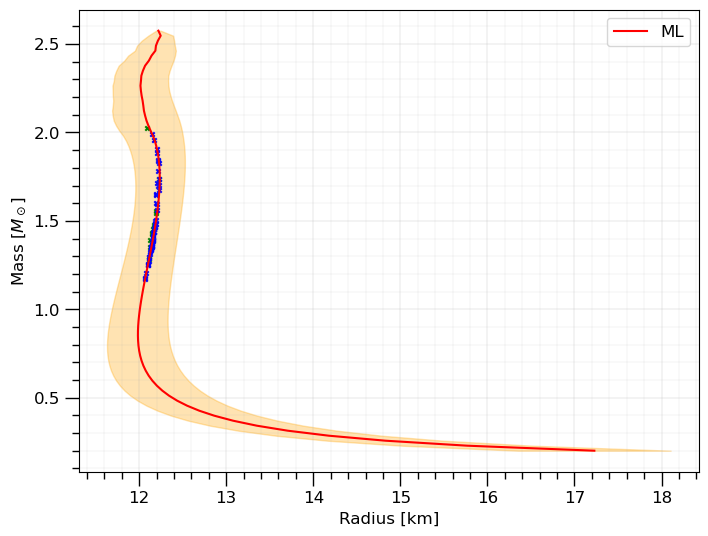

In [4]:
gm = np.linspace(0.2, 3.0, 100, dtype=float)
mult   = np.array(mchain['data']['mult'])
nlines = np.array(mchain['nlines'])[0]

plt.figure(figsize=(8,6))
plt.fill_betweenx(gm, R_avg-R_std, R_avg+R_std, color='orange', alpha=0.3)
plt.plot(R_avg, gm, label='ML', color='red')
#plt.xlim(11.4, 12.6)
#plt.ylim(1.0,2.12)

for i in range(0,len(m_src)):
    gm_src  = np.array(mchain['data/'+m_src[i]])
    rd_src  = np.array(mchain['data/'+r_src[i]])
    gm_avg  = np.average(gm_src)
    gm_std  = np.std(gm_src)
    rd_avg  = np.average(rd_src)
    rd_std  = np.std(rd_src)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #            yerr=[[gm_std], [gm_std]], color='green', elinewidth=0.5)
    plt.scatter(rd_avg, gm_avg, color='green', marker='x', s=10)

for i in range(0,len(m_nsp)):
    gm_nsp  = np.array(mchain['data/'+m_nsp[i]])
    rd_nsp  = np.interp(gm_nsp, gm, R_avg)
    gm_avg  = np.average(gm_nsp)
    gm_std  = np.std(gm_nsp)
    rd_avg  = np.average(rd_nsp)
    rd_std  = np.std(rd_nsp)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='blue', elinewidth=0.5)
    plt.scatter(rd_avg, gm_avg, color='blue', marker='x', s=10)
    
plt.xlabel('Radius [km]')
plt.ylabel('Mass [$M_\odot$]')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.show()

In [5]:
h5py.File('files/mvsr_ML.o2','r')['gm_r_3d/data'].keys()

<KeysViewHDF5 ['prob']>

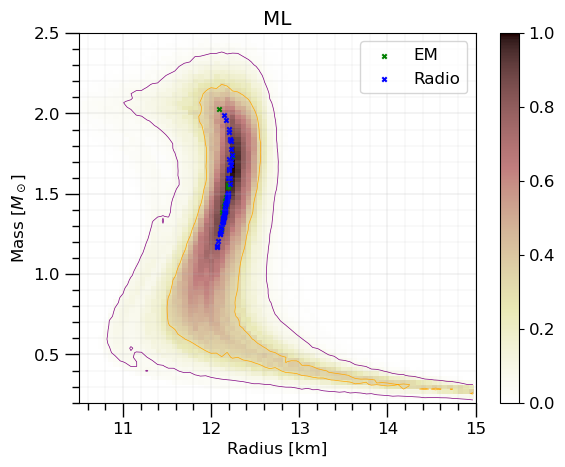

In [6]:
x = np.array(h5py.File('files/mvsr_ML.o2','r')['gm_r_3d/xval'])
y = np.array(h5py.File('files/mvsr_ML.o2','r')['gm_r_3d/yval'])
z = np.array(h5py.File('files/mvsr_ML.o2','r')['gm_r_3d/data/prob']).T
z_n = (z-np.min(z))/(np.max(z)-np.min(z))

plt.imshow(z_n, aspect='auto', origin='lower', interpolation='nearest', \
           extent=(np.min(x), np.max(x), np.min(y), np.max(y)), cmap='pink_r')
plt.colorbar()
X, Y = np.meshgrid(x, y, indexing='ij')
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.68], colors='orange', linewidths=0.5)
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.95], colors='purple', linewidths=0.5)
plt.xlim(10.5, 15.0)
plt.ylim(0.2, 2.5)
plt.xlabel('Radius [km]')
plt.ylabel('Mass [$M_\odot$]')
plt.title('ML')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)

for i in range(0,len(m_src)):
    gm_src  = np.array(mchain['data/'+m_src[i]])
    rd_src  = np.array(mchain['data/'+r_src[i]])
    gm_avg  = np.average(gm_src)
    gm_std  = np.std(gm_src)
    rd_avg  = np.average(rd_src)
    rd_std  = np.std(rd_src)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='green', elinewidth=0.5)
    pt_em = plt.scatter(rd_avg, gm_avg, color='green', marker='x', s=10)

for i in range(0,len(m_nsp)):
    gm_nsp  = np.array(mchain['data/'+m_nsp[i]])
    rd_nsp  = np.interp(gm_nsp, gm, R_avg)
    gm_avg  = np.average(gm_nsp)
    gm_std  = np.std(gm_nsp)
    rd_avg  = np.average(rd_nsp)
    rd_std  = np.std(rd_nsp)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='blue', elinewidth=0.5)
    pt_rd = plt.scatter(rd_avg, gm_avg, color='blue', marker='x', s=10)

plt.legend([pt_em, pt_rd], ['EM', 'Radio'])
plt.show()

plt.show()

## MP: $M-R$ Curves

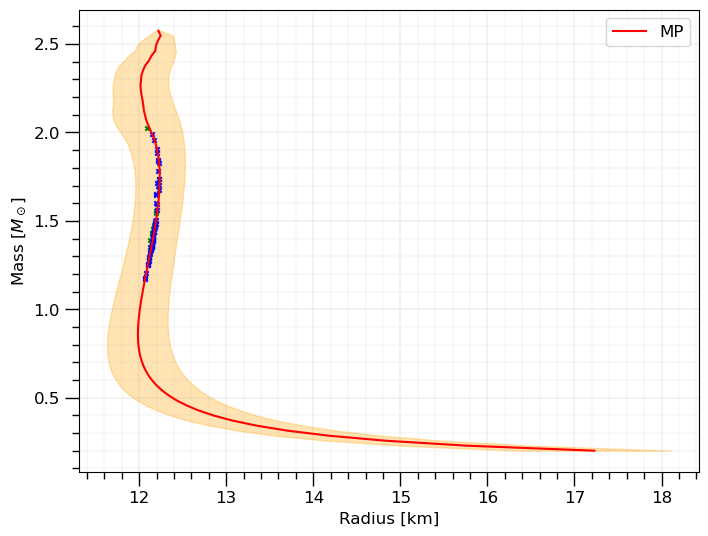

In [7]:
mchain = h5py.File('files/main_MP.o2','r')['markov_chain_0']
mult = np.array(mchain['data']['mult'])

R_0  = np.array(mchain['data']['R_0']);  R_0  = R_0[np.nonzero(R_0)];
R_1  = np.array(mchain['data']['R_1']);  R_1  = R_1[np.nonzero(R_1)];
R_2  = np.array(mchain['data']['R_2']);  R_2  = R_2[np.nonzero(R_2)];
R_3  = np.array(mchain['data']['R_3']);  R_3  = R_3[np.nonzero(R_3)];
R_4  = np.array(mchain['data']['R_4']);  R_4  = R_4[np.nonzero(R_4)];
R_5  = np.array(mchain['data']['R_5']);  R_5  = R_5[np.nonzero(R_5)];
R_6  = np.array(mchain['data']['R_6']);  R_6  = R_6[np.nonzero(R_6)];
R_7  = np.array(mchain['data']['R_7']);  R_7  = R_7[np.nonzero(R_7)];
R_8  = np.array(mchain['data']['R_8']);  R_8  = R_8[np.nonzero(R_8)];
R_9  = np.array(mchain['data']['R_9']);  R_9  = R_9[np.nonzero(R_9)];
R_10 = np.array(mchain['data']['R_10']); R_10 = R_10[np.nonzero(R_10)];
R_11 = np.array(mchain['data']['R_11']); R_11 = R_11[np.nonzero(R_11)];
R_12 = np.array(mchain['data']['R_12']); R_12 = R_12[np.nonzero(R_12)];
R_13 = np.array(mchain['data']['R_13']); R_13 = R_13[np.nonzero(R_13)];
R_14 = np.array(mchain['data']['R_14']); R_14 = R_14[np.nonzero(R_14)];
R_15 = np.array(mchain['data']['R_15']); R_15 = R_15[np.nonzero(R_15)];
R_16 = np.array(mchain['data']['R_16']); R_16 = R_16[np.nonzero(R_16)];
R_17 = np.array(mchain['data']['R_17']); R_17 = R_17[np.nonzero(R_17)];
R_18 = np.array(mchain['data']['R_18']); R_18 = R_18[np.nonzero(R_18)];
R_19 = np.array(mchain['data']['R_19']); R_19 = R_19[np.nonzero(R_19)];
R_20 = np.array(mchain['data']['R_20']); R_20 = R_20[np.nonzero(R_20)];
R_21 = np.array(mchain['data']['R_21']); R_21 = R_21[np.nonzero(R_21)];
R_22 = np.array(mchain['data']['R_22']); R_22 = R_22[np.nonzero(R_22)];
R_23 = np.array(mchain['data']['R_23']); R_23 = R_23[np.nonzero(R_23)];
R_24 = np.array(mchain['data']['R_24']); R_24 = R_24[np.nonzero(R_24)];
R_25 = np.array(mchain['data']['R_25']); R_25 = R_25[np.nonzero(R_25)];
R_26 = np.array(mchain['data']['R_26']); R_26 = R_26[np.nonzero(R_26)];
R_27 = np.array(mchain['data']['R_27']); R_27 = R_27[np.nonzero(R_27)];
R_28 = np.array(mchain['data']['R_28']); R_28 = R_28[np.nonzero(R_28)];
R_29 = np.array(mchain['data']['R_29']); R_29 = R_29[np.nonzero(R_29)];
R_30 = np.array(mchain['data']['R_30']); R_30 = R_30[np.nonzero(R_30)];
R_31 = np.array(mchain['data']['R_31']); R_31 = R_31[np.nonzero(R_31)];
R_32 = np.array(mchain['data']['R_32']); R_32 = R_32[np.nonzero(R_32)];
R_33 = np.array(mchain['data']['R_33']); R_33 = R_33[np.nonzero(R_33)];
R_34 = np.array(mchain['data']['R_34']); R_34 = R_34[np.nonzero(R_34)];
R_35 = np.array(mchain['data']['R_35']); R_35 = R_35[np.nonzero(R_35)];
R_36 = np.array(mchain['data']['R_36']); R_36 = R_36[np.nonzero(R_36)];
R_37 = np.array(mchain['data']['R_37']); R_37 = R_37[np.nonzero(R_37)];
R_38 = np.array(mchain['data']['R_38']); R_38 = R_38[np.nonzero(R_38)];
R_39 = np.array(mchain['data']['R_39']); R_39 = R_39[np.nonzero(R_39)];
R_40 = np.array(mchain['data']['R_40']); R_40 = R_40[np.nonzero(R_40)];
R_41 = np.array(mchain['data']['R_41']); R_41 = R_41[np.nonzero(R_41)];
R_42 = np.array(mchain['data']['R_42']); R_42 = R_42[np.nonzero(R_42)];
R_43 = np.array(mchain['data']['R_43']); R_43 = R_43[np.nonzero(R_43)];
R_44 = np.array(mchain['data']['R_44']); R_44 = R_44[np.nonzero(R_44)];
R_45 = np.array(mchain['data']['R_45']); R_45 = R_45[np.nonzero(R_45)];
R_46 = np.array(mchain['data']['R_46']); R_46 = R_46[np.nonzero(R_46)];
R_47 = np.array(mchain['data']['R_47']); R_47 = R_47[np.nonzero(R_47)];
R_48 = np.array(mchain['data']['R_48']); R_48 = R_48[np.nonzero(R_48)];
R_49 = np.array(mchain['data']['R_49']); R_49 = R_49[np.nonzero(R_49)];
R_50 = np.array(mchain['data']['R_50']); R_50 = R_50[np.nonzero(R_50)];
R_51 = np.array(mchain['data']['R_51']); R_51 = R_51[np.nonzero(R_51)];
R_52 = np.array(mchain['data']['R_52']); R_52 = R_52[np.nonzero(R_52)];
R_53 = np.array(mchain['data']['R_53']); R_53 = R_53[np.nonzero(R_53)];
R_54 = np.array(mchain['data']['R_54']); R_54 = R_54[np.nonzero(R_54)];
R_55 = np.array(mchain['data']['R_55']); R_55 = R_55[np.nonzero(R_55)];
R_56 = np.array(mchain['data']['R_56']); R_56 = R_56[np.nonzero(R_56)];
R_57 = np.array(mchain['data']['R_57']); R_57 = R_57[np.nonzero(R_57)];
R_58 = np.array(mchain['data']['R_58']); R_58 = R_58[np.nonzero(R_58)];
R_59 = np.array(mchain['data']['R_59']); R_59 = R_59[np.nonzero(R_59)];
R_60 = np.array(mchain['data']['R_60']); R_60 = R_60[np.nonzero(R_60)];
R_61 = np.array(mchain['data']['R_61']); R_61 = R_61[np.nonzero(R_61)];
R_62 = np.array(mchain['data']['R_62']); R_62 = R_62[np.nonzero(R_62)];
R_63 = np.array(mchain['data']['R_63']); R_63 = R_63[np.nonzero(R_63)];
R_64 = np.array(mchain['data']['R_64']); R_64 = R_64[np.nonzero(R_64)];
R_65 = np.array(mchain['data']['R_65']); R_65 = R_65[np.nonzero(R_65)];
R_66 = np.array(mchain['data']['R_66']); R_66 = R_66[np.nonzero(R_66)];
R_67 = np.array(mchain['data']['R_67']); R_67 = R_67[np.nonzero(R_67)];
R_68 = np.array(mchain['data']['R_68']); R_68 = R_68[np.nonzero(R_68)];
R_69 = np.array(mchain['data']['R_69']); R_69 = R_69[np.nonzero(R_69)];
R_70 = np.array(mchain['data']['R_70']); R_70 = R_70[np.nonzero(R_70)];
R_71 = np.array(mchain['data']['R_71']); R_71 = R_71[np.nonzero(R_71)];
R_72 = np.array(mchain['data']['R_72']); R_72 = R_72[np.nonzero(R_72)];
R_73 = np.array(mchain['data']['R_73']); R_73 = R_73[np.nonzero(R_73)];
R_74 = np.array(mchain['data']['R_74']); R_74 = R_74[np.nonzero(R_74)];
R_75 = np.array(mchain['data']['R_75']); R_75 = R_75[np.nonzero(R_75)];
R_76 = np.array(mchain['data']['R_76']); R_76 = R_76[np.nonzero(R_76)];
R_77 = np.array(mchain['data']['R_77']); R_77 = R_77[np.nonzero(R_77)];
R_78 = np.array(mchain['data']['R_78']); R_78 = R_78[np.nonzero(R_78)];
R_79 = np.array(mchain['data']['R_79']); R_79 = R_79[np.nonzero(R_79)];
R_80 = np.array(mchain['data']['R_80']); R_80 = R_80[np.nonzero(R_80)];
R_81 = np.array(mchain['data']['R_81']); R_81 = R_81[np.nonzero(R_81)];
R_82 = np.array(mchain['data']['R_82']); R_82 = R_82[np.nonzero(R_82)];
R_83 = np.array(mchain['data']['R_83']); R_83 = R_83[np.nonzero(R_83)];
R_84 = np.array(mchain['data']['R_84']); R_84 = R_84[np.nonzero(R_84)];
R_85 = np.array(mchain['data']['R_85']); R_85 = R_85[np.nonzero(R_85)];
R_86 = np.array(mchain['data']['R_86']); R_86 = R_86[np.nonzero(R_86)];
R_87 = np.array(mchain['data']['R_87']); R_87 = R_87[np.nonzero(R_87)];
R_88 = np.array(mchain['data']['R_88']); R_88 = R_88[np.nonzero(R_88)];
R_89 = np.array(mchain['data']['R_89']); R_89 = R_89[np.nonzero(R_89)];
R_90 = np.array(mchain['data']['R_90']); R_90 = R_90[np.nonzero(R_90)];
R_91 = np.array(mchain['data']['R_91']); R_91 = R_91[np.nonzero(R_91)];
R_92 = np.array(mchain['data']['R_92']); R_92 = R_92[np.nonzero(R_92)];
R_93 = np.array(mchain['data']['R_93']); R_93 = R_93[np.nonzero(R_93)];
R_94 = np.array(mchain['data']['R_94']); R_94 = R_94[np.nonzero(R_94)];
R_95 = np.array(mchain['data']['R_95']); R_95 = R_95[np.nonzero(R_95)];
R_96 = np.array(mchain['data']['R_96']); R_96 = R_96[np.nonzero(R_96)];
R_97 = np.array(mchain['data']['R_97']); R_97 = R_97[np.nonzero(R_97)];
R_98 = np.array(mchain['data']['R_98']); R_98 = R_98[np.nonzero(R_98)];
R_99 = np.array(mchain['data']['R_99']); R_99 = R_99[np.nonzero(R_99)];

R_avg = np.array([np.mean(R_0),  np.mean(R_1),  np.mean(R_2),  np.mean(R_3),  np.mean(R_4),  np.mean(R_5),  np.mean(R_6),  np.mean(R_7),  np.mean(R_8),  np.mean(R_9), \
                  np.mean(R_10), np.mean(R_11), np.mean(R_12), np.mean(R_13), np.mean(R_14), np.mean(R_15), np.mean(R_16), np.mean(R_17), np.mean(R_18), np.mean(R_19), \
                  np.mean(R_20), np.mean(R_21), np.mean(R_22), np.mean(R_23), np.mean(R_24), np.mean(R_25), np.mean(R_26), np.mean(R_27), np.mean(R_28), np.mean(R_29), \
                  np.mean(R_30), np.mean(R_31), np.mean(R_32), np.mean(R_33), np.mean(R_34), np.mean(R_35), np.mean(R_36), np.mean(R_37), np.mean(R_38), np.mean(R_39), \
                  np.mean(R_40), np.mean(R_41), np.mean(R_42), np.mean(R_43), np.mean(R_44), np.mean(R_45), np.mean(R_46), np.mean(R_47), np.mean(R_48), np.mean(R_49), \
                  np.mean(R_50), np.mean(R_51), np.mean(R_52), np.mean(R_53), np.mean(R_54), np.mean(R_55), np.mean(R_56), np.mean(R_57), np.mean(R_58), np.mean(R_59), \
                  np.mean(R_60), np.mean(R_61), np.mean(R_62), np.mean(R_63), np.mean(R_64), np.mean(R_65), np.mean(R_66), np.mean(R_67), np.mean(R_68), np.mean(R_69), \
                  np.mean(R_70), np.mean(R_71), np.mean(R_72), np.mean(R_73), np.mean(R_74), np.mean(R_75), np.mean(R_76), np.mean(R_77), np.mean(R_78), np.mean(R_79), \
                  np.mean(R_80), np.mean(R_81), np.mean(R_82), np.mean(R_83), np.mean(R_84), np.mean(R_85), np.mean(R_86), np.mean(R_87), np.mean(R_88), np.mean(R_89), \
                  np.mean(R_90), np.mean(R_91), np.mean(R_92), np.mean(R_93), np.mean(R_94), np.mean(R_95), np.mean(R_96), np.mean(R_97), np.mean(R_98), np.mean(R_99)])

R_std = np.array([np.std(R_0),  np.std(R_1),  np.std(R_2),  np.std(R_3),  np.std(R_4),  np.std(R_5),  np.std(R_6),  np.std(R_7),  np.std(R_8),  np.std(R_9), \
                  np.std(R_10), np.std(R_11), np.std(R_12), np.std(R_13), np.std(R_14), np.std(R_15), np.std(R_16), np.std(R_17), np.std(R_18), np.std(R_19), \
                  np.std(R_20), np.std(R_21), np.std(R_22), np.std(R_23), np.std(R_24), np.std(R_25), np.std(R_26), np.std(R_27), np.std(R_28), np.std(R_29), \
                  np.std(R_30), np.std(R_31), np.std(R_32), np.std(R_33), np.std(R_34), np.std(R_35), np.std(R_36), np.std(R_37), np.std(R_38), np.std(R_39), \
                  np.std(R_40), np.std(R_41), np.std(R_42), np.std(R_43), np.std(R_44), np.std(R_45), np.std(R_46), np.std(R_47), np.std(R_48), np.std(R_49), \
                  np.std(R_50), np.std(R_51), np.std(R_52), np.std(R_53), np.std(R_54), np.std(R_55), np.std(R_56), np.std(R_57), np.std(R_58), np.std(R_59), \
                  np.std(R_60), np.std(R_61), np.std(R_62), np.std(R_63), np.std(R_64), np.std(R_65), np.std(R_66), np.std(R_67), np.std(R_68), np.std(R_69), \
                  np.std(R_70), np.std(R_71), np.std(R_72), np.std(R_73), np.std(R_74), np.std(R_75), np.std(R_76), np.std(R_77), np.std(R_78), np.std(R_79), \
                  np.std(R_80), np.std(R_81), np.std(R_82), np.std(R_83), np.std(R_84), np.std(R_85), np.std(R_86), np.std(R_87), np.std(R_88), np.std(R_89), \
                  np.std(R_90), np.std(R_91), np.std(R_92), np.std(R_93), np.std(R_94), np.std(R_95), np.std(R_96), np.std(R_97), np.std(R_98), np.std(R_99)])

gm = np.linspace(0.2, 3.0, 100, dtype=float)
mult   = np.array(mchain['data']['mult'])
nlines = np.array(mchain['nlines'])[0]

plt.figure(figsize=(8,6))
plt.fill_betweenx(gm, R_avg-R_std, R_avg+R_std, color='orange', alpha=0.3)
plt.plot(R_avg, gm, label='MP', color='red')
#plt.xlim(11.4, 12.6)
#plt.ylim(1.0,2.12)

for i in range(0,len(m_src)):
    gm_src  = np.array(mchain['data/'+m_src[i]])
    rd_src  = np.array(mchain['data/'+r_src[i]])
    gm_avg  = np.average(gm_src)
    gm_std  = np.std(gm_src)
    rd_avg  = np.average(rd_src)
    rd_std  = np.std(rd_src)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='green', elinewidth=0.5)
    plt.scatter(rd_avg, gm_avg, color='green', marker='x', s=10)

for i in range(0,len(m_nsp)):
    gm_nsp  = np.array(mchain['data/'+m_nsp[i]])
    rd_nsp  = np.interp(gm_nsp, gm, R_avg)
    gm_avg  = np.average(gm_nsp)
    gm_std  = np.std(gm_nsp)
    rd_avg  = np.average(rd_nsp)
    rd_std  = np.std(rd_nsp)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='blue', elinewidth=0.5)
    plt.scatter(rd_avg, gm_avg, color='blue', marker='x', s=10)
    
plt.xlabel('Radius [km]')
plt.ylabel('Mass [$M_\odot$]')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.show()

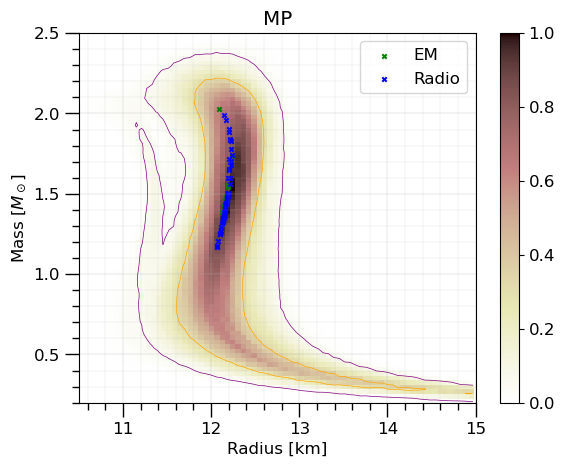

In [8]:
x = np.array(h5py.File('files/mvsr_MP.o2','r')['gm_r_3d/xval'])
y = np.array(h5py.File('files/mvsr_MP.o2','r')['gm_r_3d/yval'])
z = np.array(h5py.File('files/mvsr_MP.o2','r')['gm_r_3d/data/prob']).T
z_n = (z-np.min(z))/(np.max(z)-np.min(z))

plt.imshow(z_n, aspect='auto', origin='lower', interpolation='nearest', \
           extent=(np.min(x), np.max(x), np.min(y), np.max(y)), cmap='pink_r')
plt.colorbar()
X, Y = np.meshgrid(x, y, indexing='ij')
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.68], colors='orange', linewidths=0.5)
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.95], colors='purple', linewidths=0.5)
plt.xlim(10.5, 15.0)
plt.ylim(0.2, 2.5)
plt.xlabel('Radius [km]')
plt.ylabel('Mass [$M_\odot$]')
plt.title('MP')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)

for i in range(0,len(m_src)):
    gm_src  = np.array(mchain['data/'+m_src[i]])
    rd_src  = np.array(mchain['data/'+r_src[i]])
    gm_avg  = np.average(gm_src)
    gm_std  = np.std(gm_src)
    rd_avg  = np.average(rd_src)
    rd_std  = np.std(rd_src)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='green', elinewidth=0.5)
    pt_em = plt.scatter(rd_avg, gm_avg, color='green', marker='x', s=10)

for i in range(0,len(m_nsp)):
    gm_nsp  = np.array(mchain['data/'+m_nsp[i]])
    rd_nsp  = np.interp(gm_nsp, gm, R_avg)
    gm_avg  = np.average(gm_nsp)
    gm_std  = np.std(gm_nsp)
    rd_avg  = np.average(rd_nsp)
    rd_std  = np.std(rd_nsp)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='blue', elinewidth=0.5)
    pt_rd = plt.scatter(rd_avg, gm_avg, color='blue', marker='x', s=10)

plt.legend([pt_em, pt_rd], ['EM', 'Radio'])
plt.show()

## NL: $M-R$ Curves

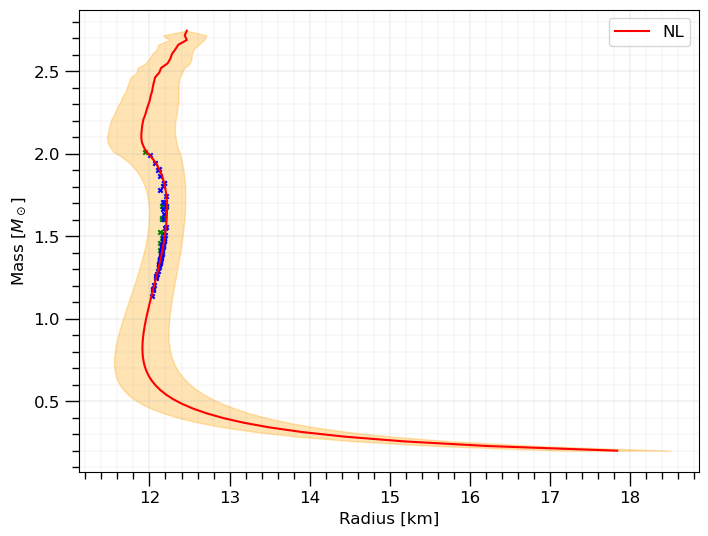

In [9]:
mchain = h5py.File('files/main_NL.o2','r')['markov_chain_0']
mult = np.array(mchain['data']['mult'])

R_0  = np.array(mchain['data']['R_0']);  R_0  = R_0[np.nonzero(R_0)];
R_1  = np.array(mchain['data']['R_1']);  R_1  = R_1[np.nonzero(R_1)];
R_2  = np.array(mchain['data']['R_2']);  R_2  = R_2[np.nonzero(R_2)];
R_3  = np.array(mchain['data']['R_3']);  R_3  = R_3[np.nonzero(R_3)];
R_4  = np.array(mchain['data']['R_4']);  R_4  = R_4[np.nonzero(R_4)];
R_5  = np.array(mchain['data']['R_5']);  R_5  = R_5[np.nonzero(R_5)];
R_6  = np.array(mchain['data']['R_6']);  R_6  = R_6[np.nonzero(R_6)];
R_7  = np.array(mchain['data']['R_7']);  R_7  = R_7[np.nonzero(R_7)];
R_8  = np.array(mchain['data']['R_8']);  R_8  = R_8[np.nonzero(R_8)];
R_9  = np.array(mchain['data']['R_9']);  R_9  = R_9[np.nonzero(R_9)];
R_10 = np.array(mchain['data']['R_10']); R_10 = R_10[np.nonzero(R_10)];
R_11 = np.array(mchain['data']['R_11']); R_11 = R_11[np.nonzero(R_11)];
R_12 = np.array(mchain['data']['R_12']); R_12 = R_12[np.nonzero(R_12)];
R_13 = np.array(mchain['data']['R_13']); R_13 = R_13[np.nonzero(R_13)];
R_14 = np.array(mchain['data']['R_14']); R_14 = R_14[np.nonzero(R_14)];
R_15 = np.array(mchain['data']['R_15']); R_15 = R_15[np.nonzero(R_15)];
R_16 = np.array(mchain['data']['R_16']); R_16 = R_16[np.nonzero(R_16)];
R_17 = np.array(mchain['data']['R_17']); R_17 = R_17[np.nonzero(R_17)];
R_18 = np.array(mchain['data']['R_18']); R_18 = R_18[np.nonzero(R_18)];
R_19 = np.array(mchain['data']['R_19']); R_19 = R_19[np.nonzero(R_19)];
R_20 = np.array(mchain['data']['R_20']); R_20 = R_20[np.nonzero(R_20)];
R_21 = np.array(mchain['data']['R_21']); R_21 = R_21[np.nonzero(R_21)];
R_22 = np.array(mchain['data']['R_22']); R_22 = R_22[np.nonzero(R_22)];
R_23 = np.array(mchain['data']['R_23']); R_23 = R_23[np.nonzero(R_23)];
R_24 = np.array(mchain['data']['R_24']); R_24 = R_24[np.nonzero(R_24)];
R_25 = np.array(mchain['data']['R_25']); R_25 = R_25[np.nonzero(R_25)];
R_26 = np.array(mchain['data']['R_26']); R_26 = R_26[np.nonzero(R_26)];
R_27 = np.array(mchain['data']['R_27']); R_27 = R_27[np.nonzero(R_27)];
R_28 = np.array(mchain['data']['R_28']); R_28 = R_28[np.nonzero(R_28)];
R_29 = np.array(mchain['data']['R_29']); R_29 = R_29[np.nonzero(R_29)];
R_30 = np.array(mchain['data']['R_30']); R_30 = R_30[np.nonzero(R_30)];
R_31 = np.array(mchain['data']['R_31']); R_31 = R_31[np.nonzero(R_31)];
R_32 = np.array(mchain['data']['R_32']); R_32 = R_32[np.nonzero(R_32)];
R_33 = np.array(mchain['data']['R_33']); R_33 = R_33[np.nonzero(R_33)];
R_34 = np.array(mchain['data']['R_34']); R_34 = R_34[np.nonzero(R_34)];
R_35 = np.array(mchain['data']['R_35']); R_35 = R_35[np.nonzero(R_35)];
R_36 = np.array(mchain['data']['R_36']); R_36 = R_36[np.nonzero(R_36)];
R_37 = np.array(mchain['data']['R_37']); R_37 = R_37[np.nonzero(R_37)];
R_38 = np.array(mchain['data']['R_38']); R_38 = R_38[np.nonzero(R_38)];
R_39 = np.array(mchain['data']['R_39']); R_39 = R_39[np.nonzero(R_39)];
R_40 = np.array(mchain['data']['R_40']); R_40 = R_40[np.nonzero(R_40)];
R_41 = np.array(mchain['data']['R_41']); R_41 = R_41[np.nonzero(R_41)];
R_42 = np.array(mchain['data']['R_42']); R_42 = R_42[np.nonzero(R_42)];
R_43 = np.array(mchain['data']['R_43']); R_43 = R_43[np.nonzero(R_43)];
R_44 = np.array(mchain['data']['R_44']); R_44 = R_44[np.nonzero(R_44)];
R_45 = np.array(mchain['data']['R_45']); R_45 = R_45[np.nonzero(R_45)];
R_46 = np.array(mchain['data']['R_46']); R_46 = R_46[np.nonzero(R_46)];
R_47 = np.array(mchain['data']['R_47']); R_47 = R_47[np.nonzero(R_47)];
R_48 = np.array(mchain['data']['R_48']); R_48 = R_48[np.nonzero(R_48)];
R_49 = np.array(mchain['data']['R_49']); R_49 = R_49[np.nonzero(R_49)];
R_50 = np.array(mchain['data']['R_50']); R_50 = R_50[np.nonzero(R_50)];
R_51 = np.array(mchain['data']['R_51']); R_51 = R_51[np.nonzero(R_51)];
R_52 = np.array(mchain['data']['R_52']); R_52 = R_52[np.nonzero(R_52)];
R_53 = np.array(mchain['data']['R_53']); R_53 = R_53[np.nonzero(R_53)];
R_54 = np.array(mchain['data']['R_54']); R_54 = R_54[np.nonzero(R_54)];
R_55 = np.array(mchain['data']['R_55']); R_55 = R_55[np.nonzero(R_55)];
R_56 = np.array(mchain['data']['R_56']); R_56 = R_56[np.nonzero(R_56)];
R_57 = np.array(mchain['data']['R_57']); R_57 = R_57[np.nonzero(R_57)];
R_58 = np.array(mchain['data']['R_58']); R_58 = R_58[np.nonzero(R_58)];
R_59 = np.array(mchain['data']['R_59']); R_59 = R_59[np.nonzero(R_59)];
R_60 = np.array(mchain['data']['R_60']); R_60 = R_60[np.nonzero(R_60)];
R_61 = np.array(mchain['data']['R_61']); R_61 = R_61[np.nonzero(R_61)];
R_62 = np.array(mchain['data']['R_62']); R_62 = R_62[np.nonzero(R_62)];
R_63 = np.array(mchain['data']['R_63']); R_63 = R_63[np.nonzero(R_63)];
R_64 = np.array(mchain['data']['R_64']); R_64 = R_64[np.nonzero(R_64)];
R_65 = np.array(mchain['data']['R_65']); R_65 = R_65[np.nonzero(R_65)];
R_66 = np.array(mchain['data']['R_66']); R_66 = R_66[np.nonzero(R_66)];
R_67 = np.array(mchain['data']['R_67']); R_67 = R_67[np.nonzero(R_67)];
R_68 = np.array(mchain['data']['R_68']); R_68 = R_68[np.nonzero(R_68)];
R_69 = np.array(mchain['data']['R_69']); R_69 = R_69[np.nonzero(R_69)];
R_70 = np.array(mchain['data']['R_70']); R_70 = R_70[np.nonzero(R_70)];
R_71 = np.array(mchain['data']['R_71']); R_71 = R_71[np.nonzero(R_71)];
R_72 = np.array(mchain['data']['R_72']); R_72 = R_72[np.nonzero(R_72)];
R_73 = np.array(mchain['data']['R_73']); R_73 = R_73[np.nonzero(R_73)];
R_74 = np.array(mchain['data']['R_74']); R_74 = R_74[np.nonzero(R_74)];
R_75 = np.array(mchain['data']['R_75']); R_75 = R_75[np.nonzero(R_75)];
R_76 = np.array(mchain['data']['R_76']); R_76 = R_76[np.nonzero(R_76)];
R_77 = np.array(mchain['data']['R_77']); R_77 = R_77[np.nonzero(R_77)];
R_78 = np.array(mchain['data']['R_78']); R_78 = R_78[np.nonzero(R_78)];
R_79 = np.array(mchain['data']['R_79']); R_79 = R_79[np.nonzero(R_79)];
R_80 = np.array(mchain['data']['R_80']); R_80 = R_80[np.nonzero(R_80)];
R_81 = np.array(mchain['data']['R_81']); R_81 = R_81[np.nonzero(R_81)];
R_82 = np.array(mchain['data']['R_82']); R_82 = R_82[np.nonzero(R_82)];
R_83 = np.array(mchain['data']['R_83']); R_83 = R_83[np.nonzero(R_83)];
R_84 = np.array(mchain['data']['R_84']); R_84 = R_84[np.nonzero(R_84)];
R_85 = np.array(mchain['data']['R_85']); R_85 = R_85[np.nonzero(R_85)];
R_86 = np.array(mchain['data']['R_86']); R_86 = R_86[np.nonzero(R_86)];
R_87 = np.array(mchain['data']['R_87']); R_87 = R_87[np.nonzero(R_87)];
R_88 = np.array(mchain['data']['R_88']); R_88 = R_88[np.nonzero(R_88)];
R_89 = np.array(mchain['data']['R_89']); R_89 = R_89[np.nonzero(R_89)];
R_90 = np.array(mchain['data']['R_90']); R_90 = R_90[np.nonzero(R_90)];
R_91 = np.array(mchain['data']['R_91']); R_91 = R_91[np.nonzero(R_91)];
R_92 = np.array(mchain['data']['R_92']); R_92 = R_92[np.nonzero(R_92)];
R_93 = np.array(mchain['data']['R_93']); R_93 = R_93[np.nonzero(R_93)];
R_94 = np.array(mchain['data']['R_94']); R_94 = R_94[np.nonzero(R_94)];
R_95 = np.array(mchain['data']['R_95']); R_95 = R_95[np.nonzero(R_95)];
R_96 = np.array(mchain['data']['R_96']); R_96 = R_96[np.nonzero(R_96)];
R_97 = np.array(mchain['data']['R_97']); R_97 = R_97[np.nonzero(R_97)];
R_98 = np.array(mchain['data']['R_98']); R_98 = R_98[np.nonzero(R_98)];
R_99 = np.array(mchain['data']['R_99']); R_99 = R_99[np.nonzero(R_99)];

R_avg = np.array([np.mean(R_0),  np.mean(R_1),  np.mean(R_2),  np.mean(R_3),  np.mean(R_4),  np.mean(R_5),  np.mean(R_6),  np.mean(R_7),  np.mean(R_8),  np.mean(R_9), \
                  np.mean(R_10), np.mean(R_11), np.mean(R_12), np.mean(R_13), np.mean(R_14), np.mean(R_15), np.mean(R_16), np.mean(R_17), np.mean(R_18), np.mean(R_19), \
                  np.mean(R_20), np.mean(R_21), np.mean(R_22), np.mean(R_23), np.mean(R_24), np.mean(R_25), np.mean(R_26), np.mean(R_27), np.mean(R_28), np.mean(R_29), \
                  np.mean(R_30), np.mean(R_31), np.mean(R_32), np.mean(R_33), np.mean(R_34), np.mean(R_35), np.mean(R_36), np.mean(R_37), np.mean(R_38), np.mean(R_39), \
                  np.mean(R_40), np.mean(R_41), np.mean(R_42), np.mean(R_43), np.mean(R_44), np.mean(R_45), np.mean(R_46), np.mean(R_47), np.mean(R_48), np.mean(R_49), \
                  np.mean(R_50), np.mean(R_51), np.mean(R_52), np.mean(R_53), np.mean(R_54), np.mean(R_55), np.mean(R_56), np.mean(R_57), np.mean(R_58), np.mean(R_59), \
                  np.mean(R_60), np.mean(R_61), np.mean(R_62), np.mean(R_63), np.mean(R_64), np.mean(R_65), np.mean(R_66), np.mean(R_67), np.mean(R_68), np.mean(R_69), \
                  np.mean(R_70), np.mean(R_71), np.mean(R_72), np.mean(R_73), np.mean(R_74), np.mean(R_75), np.mean(R_76), np.mean(R_77), np.mean(R_78), np.mean(R_79), \
                  np.mean(R_80), np.mean(R_81), np.mean(R_82), np.mean(R_83), np.mean(R_84), np.mean(R_85), np.mean(R_86), np.mean(R_87), np.mean(R_88), np.mean(R_89), \
                  np.mean(R_90), np.mean(R_91), np.mean(R_92), np.mean(R_93), np.mean(R_94), np.mean(R_95), np.mean(R_96), np.mean(R_97), np.mean(R_98), np.mean(R_99)])

R_std = np.array([np.std(R_0),  np.std(R_1),  np.std(R_2),  np.std(R_3),  np.std(R_4),  np.std(R_5),  np.std(R_6),  np.std(R_7),  np.std(R_8),  np.std(R_9), \
                  np.std(R_10), np.std(R_11), np.std(R_12), np.std(R_13), np.std(R_14), np.std(R_15), np.std(R_16), np.std(R_17), np.std(R_18), np.std(R_19), \
                  np.std(R_20), np.std(R_21), np.std(R_22), np.std(R_23), np.std(R_24), np.std(R_25), np.std(R_26), np.std(R_27), np.std(R_28), np.std(R_29), \
                  np.std(R_30), np.std(R_31), np.std(R_32), np.std(R_33), np.std(R_34), np.std(R_35), np.std(R_36), np.std(R_37), np.std(R_38), np.std(R_39), \
                  np.std(R_40), np.std(R_41), np.std(R_42), np.std(R_43), np.std(R_44), np.std(R_45), np.std(R_46), np.std(R_47), np.std(R_48), np.std(R_49), \
                  np.std(R_50), np.std(R_51), np.std(R_52), np.std(R_53), np.std(R_54), np.std(R_55), np.std(R_56), np.std(R_57), np.std(R_58), np.std(R_59), \
                  np.std(R_60), np.std(R_61), np.std(R_62), np.std(R_63), np.std(R_64), np.std(R_65), np.std(R_66), np.std(R_67), np.std(R_68), np.std(R_69), \
                  np.std(R_70), np.std(R_71), np.std(R_72), np.std(R_73), np.std(R_74), np.std(R_75), np.std(R_76), np.std(R_77), np.std(R_78), np.std(R_79), \
                  np.std(R_80), np.std(R_81), np.std(R_82), np.std(R_83), np.std(R_84), np.std(R_85), np.std(R_86), np.std(R_87), np.std(R_88), np.std(R_89), \
                  np.std(R_90), np.std(R_91), np.std(R_92), np.std(R_93), np.std(R_94), np.std(R_95), np.std(R_96), np.std(R_97), np.std(R_98), np.std(R_99)])

gm = np.linspace(0.2, 3.0, 100, dtype=float)
mult   = np.array(mchain['data']['mult'])
nlines = np.array(mchain['nlines'])[0]

plt.figure(figsize=(8,6))
plt.fill_betweenx(gm, R_avg-R_std, R_avg+R_std, color='orange', alpha=0.3)
plt.plot(R_avg, gm, label='NL', color='red')
#plt.xlim(11.4, 12.6)
#plt.ylim(1.0,2.12)

for i in range(0,len(m_src)):
    gm_src  = np.array(mchain['data/'+m_src[i]])
    rd_src  = np.array(mchain['data/'+r_src[i]])
    gm_avg  = np.average(gm_src)
    gm_std  = np.std(gm_src)
    rd_avg  = np.average(rd_src)
    rd_std  = np.std(rd_src)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='green', elinewidth=0.5)
    plt.scatter(rd_avg, gm_avg, color='green', marker='x', s=10)

for i in range(0,len(m_nsp)):
    gm_nsp  = np.array(mchain['data/'+m_nsp[i]])
    rd_nsp  = np.interp(gm_nsp, gm, R_avg)
    gm_avg  = np.average(gm_nsp)
    gm_std  = np.std(gm_nsp)
    rd_avg  = np.average(rd_nsp)
    rd_std  = np.std(rd_nsp)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='blue', elinewidth=0.5)
    plt.scatter(rd_avg, gm_avg, color='blue', marker='x', s=10)
    
plt.xlabel('Radius [km]')
plt.ylabel('Mass [$M_\odot$]')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.show()

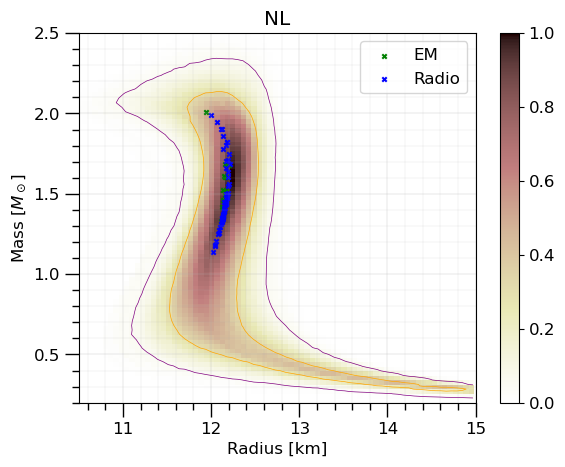

In [10]:
x = np.array(h5py.File('files/mvsr_NL.o2','r')['gm_r_3d/xval'])
y = np.array(h5py.File('files/mvsr_NL.o2','r')['gm_r_3d/yval'])
z = np.array(h5py.File('files/mvsr_NL.o2','r')['gm_r_3d/data/prob']).T
z_n = (z-np.min(z))/(np.max(z)-np.min(z))

plt.imshow(z_n, aspect='auto', origin='lower', interpolation='nearest', \
           extent=(np.min(x), np.max(x), np.min(y), np.max(y)), cmap='pink_r')
plt.colorbar()
X, Y = np.meshgrid(x, y, indexing='ij')
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.68], colors='orange', linewidths=0.5)
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.95], colors='purple', linewidths=0.5)
plt.xlim(10.5, 15.0)
plt.ylim(0.2, 2.5)
plt.xlabel('Radius [km]')
plt.ylabel('Mass [$M_\odot$]')
plt.title('NL')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)

for i in range(0,len(m_src)):
    gm_src  = np.array(mchain['data/'+m_src[i]])
    rd_src  = np.array(mchain['data/'+r_src[i]])
    gm_avg  = np.average(gm_src)
    gm_std  = np.std(gm_src)
    rd_avg  = np.average(rd_src)
    rd_std  = np.std(rd_src)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='green', elinewidth=0.5)
    pt_em = plt.scatter(rd_avg, gm_avg, color='green', marker='x', s=10)

for i in range(0,len(m_nsp)):
    gm_nsp  = np.array(mchain['data/'+m_nsp[i]])
    rd_nsp  = np.interp(gm_nsp, gm, R_avg)
    gm_avg  = np.average(gm_nsp)
    gm_std  = np.std(gm_nsp)
    rd_avg  = np.average(rd_nsp)
    rd_std  = np.std(rd_nsp)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='blue', elinewidth=0.5)
    pt_rd = plt.scatter(rd_avg, gm_avg, color='blue', marker='x', s=10)

plt.legend([pt_em, pt_rd], ['EM', 'Radio'])
plt.show()

plt.show()

## NP: $M-R$ Curves

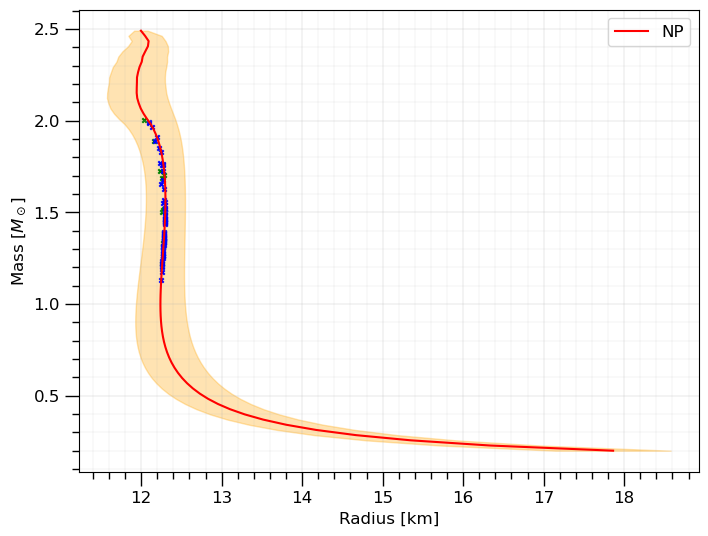

In [11]:
mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
mult = np.array(mchain['data']['mult'])

R_0  = np.array(mchain['data']['R_0']);  R_0  = R_0[np.nonzero(R_0)];
R_1  = np.array(mchain['data']['R_1']);  R_1  = R_1[np.nonzero(R_1)];
R_2  = np.array(mchain['data']['R_2']);  R_2  = R_2[np.nonzero(R_2)];
R_3  = np.array(mchain['data']['R_3']);  R_3  = R_3[np.nonzero(R_3)];
R_4  = np.array(mchain['data']['R_4']);  R_4  = R_4[np.nonzero(R_4)];
R_5  = np.array(mchain['data']['R_5']);  R_5  = R_5[np.nonzero(R_5)];
R_6  = np.array(mchain['data']['R_6']);  R_6  = R_6[np.nonzero(R_6)];
R_7  = np.array(mchain['data']['R_7']);  R_7  = R_7[np.nonzero(R_7)];
R_8  = np.array(mchain['data']['R_8']);  R_8  = R_8[np.nonzero(R_8)];
R_9  = np.array(mchain['data']['R_9']);  R_9  = R_9[np.nonzero(R_9)];
R_10 = np.array(mchain['data']['R_10']); R_10 = R_10[np.nonzero(R_10)];
R_11 = np.array(mchain['data']['R_11']); R_11 = R_11[np.nonzero(R_11)];
R_12 = np.array(mchain['data']['R_12']); R_12 = R_12[np.nonzero(R_12)];
R_13 = np.array(mchain['data']['R_13']); R_13 = R_13[np.nonzero(R_13)];
R_14 = np.array(mchain['data']['R_14']); R_14 = R_14[np.nonzero(R_14)];
R_15 = np.array(mchain['data']['R_15']); R_15 = R_15[np.nonzero(R_15)];
R_16 = np.array(mchain['data']['R_16']); R_16 = R_16[np.nonzero(R_16)];
R_17 = np.array(mchain['data']['R_17']); R_17 = R_17[np.nonzero(R_17)];
R_18 = np.array(mchain['data']['R_18']); R_18 = R_18[np.nonzero(R_18)];
R_19 = np.array(mchain['data']['R_19']); R_19 = R_19[np.nonzero(R_19)];
R_20 = np.array(mchain['data']['R_20']); R_20 = R_20[np.nonzero(R_20)];
R_21 = np.array(mchain['data']['R_21']); R_21 = R_21[np.nonzero(R_21)];
R_22 = np.array(mchain['data']['R_22']); R_22 = R_22[np.nonzero(R_22)];
R_23 = np.array(mchain['data']['R_23']); R_23 = R_23[np.nonzero(R_23)];
R_24 = np.array(mchain['data']['R_24']); R_24 = R_24[np.nonzero(R_24)];
R_25 = np.array(mchain['data']['R_25']); R_25 = R_25[np.nonzero(R_25)];
R_26 = np.array(mchain['data']['R_26']); R_26 = R_26[np.nonzero(R_26)];
R_27 = np.array(mchain['data']['R_27']); R_27 = R_27[np.nonzero(R_27)];
R_28 = np.array(mchain['data']['R_28']); R_28 = R_28[np.nonzero(R_28)];
R_29 = np.array(mchain['data']['R_29']); R_29 = R_29[np.nonzero(R_29)];
R_30 = np.array(mchain['data']['R_30']); R_30 = R_30[np.nonzero(R_30)];
R_31 = np.array(mchain['data']['R_31']); R_31 = R_31[np.nonzero(R_31)];
R_32 = np.array(mchain['data']['R_32']); R_32 = R_32[np.nonzero(R_32)];
R_33 = np.array(mchain['data']['R_33']); R_33 = R_33[np.nonzero(R_33)];
R_34 = np.array(mchain['data']['R_34']); R_34 = R_34[np.nonzero(R_34)];
R_35 = np.array(mchain['data']['R_35']); R_35 = R_35[np.nonzero(R_35)];
R_36 = np.array(mchain['data']['R_36']); R_36 = R_36[np.nonzero(R_36)];
R_37 = np.array(mchain['data']['R_37']); R_37 = R_37[np.nonzero(R_37)];
R_38 = np.array(mchain['data']['R_38']); R_38 = R_38[np.nonzero(R_38)];
R_39 = np.array(mchain['data']['R_39']); R_39 = R_39[np.nonzero(R_39)];
R_40 = np.array(mchain['data']['R_40']); R_40 = R_40[np.nonzero(R_40)];
R_41 = np.array(mchain['data']['R_41']); R_41 = R_41[np.nonzero(R_41)];
R_42 = np.array(mchain['data']['R_42']); R_42 = R_42[np.nonzero(R_42)];
R_43 = np.array(mchain['data']['R_43']); R_43 = R_43[np.nonzero(R_43)];
R_44 = np.array(mchain['data']['R_44']); R_44 = R_44[np.nonzero(R_44)];
R_45 = np.array(mchain['data']['R_45']); R_45 = R_45[np.nonzero(R_45)];
R_46 = np.array(mchain['data']['R_46']); R_46 = R_46[np.nonzero(R_46)];
R_47 = np.array(mchain['data']['R_47']); R_47 = R_47[np.nonzero(R_47)];
R_48 = np.array(mchain['data']['R_48']); R_48 = R_48[np.nonzero(R_48)];
R_49 = np.array(mchain['data']['R_49']); R_49 = R_49[np.nonzero(R_49)];
R_50 = np.array(mchain['data']['R_50']); R_50 = R_50[np.nonzero(R_50)];
R_51 = np.array(mchain['data']['R_51']); R_51 = R_51[np.nonzero(R_51)];
R_52 = np.array(mchain['data']['R_52']); R_52 = R_52[np.nonzero(R_52)];
R_53 = np.array(mchain['data']['R_53']); R_53 = R_53[np.nonzero(R_53)];
R_54 = np.array(mchain['data']['R_54']); R_54 = R_54[np.nonzero(R_54)];
R_55 = np.array(mchain['data']['R_55']); R_55 = R_55[np.nonzero(R_55)];
R_56 = np.array(mchain['data']['R_56']); R_56 = R_56[np.nonzero(R_56)];
R_57 = np.array(mchain['data']['R_57']); R_57 = R_57[np.nonzero(R_57)];
R_58 = np.array(mchain['data']['R_58']); R_58 = R_58[np.nonzero(R_58)];
R_59 = np.array(mchain['data']['R_59']); R_59 = R_59[np.nonzero(R_59)];
R_60 = np.array(mchain['data']['R_60']); R_60 = R_60[np.nonzero(R_60)];
R_61 = np.array(mchain['data']['R_61']); R_61 = R_61[np.nonzero(R_61)];
R_62 = np.array(mchain['data']['R_62']); R_62 = R_62[np.nonzero(R_62)];
R_63 = np.array(mchain['data']['R_63']); R_63 = R_63[np.nonzero(R_63)];
R_64 = np.array(mchain['data']['R_64']); R_64 = R_64[np.nonzero(R_64)];
R_65 = np.array(mchain['data']['R_65']); R_65 = R_65[np.nonzero(R_65)];
R_66 = np.array(mchain['data']['R_66']); R_66 = R_66[np.nonzero(R_66)];
R_67 = np.array(mchain['data']['R_67']); R_67 = R_67[np.nonzero(R_67)];
R_68 = np.array(mchain['data']['R_68']); R_68 = R_68[np.nonzero(R_68)];
R_69 = np.array(mchain['data']['R_69']); R_69 = R_69[np.nonzero(R_69)];
R_70 = np.array(mchain['data']['R_70']); R_70 = R_70[np.nonzero(R_70)];
R_71 = np.array(mchain['data']['R_71']); R_71 = R_71[np.nonzero(R_71)];
R_72 = np.array(mchain['data']['R_72']); R_72 = R_72[np.nonzero(R_72)];
R_73 = np.array(mchain['data']['R_73']); R_73 = R_73[np.nonzero(R_73)];
R_74 = np.array(mchain['data']['R_74']); R_74 = R_74[np.nonzero(R_74)];
R_75 = np.array(mchain['data']['R_75']); R_75 = R_75[np.nonzero(R_75)];
R_76 = np.array(mchain['data']['R_76']); R_76 = R_76[np.nonzero(R_76)];
R_77 = np.array(mchain['data']['R_77']); R_77 = R_77[np.nonzero(R_77)];
R_78 = np.array(mchain['data']['R_78']); R_78 = R_78[np.nonzero(R_78)];
R_79 = np.array(mchain['data']['R_79']); R_79 = R_79[np.nonzero(R_79)];
R_80 = np.array(mchain['data']['R_80']); R_80 = R_80[np.nonzero(R_80)];
R_81 = np.array(mchain['data']['R_81']); R_81 = R_81[np.nonzero(R_81)];
R_82 = np.array(mchain['data']['R_82']); R_82 = R_82[np.nonzero(R_82)];
R_83 = np.array(mchain['data']['R_83']); R_83 = R_83[np.nonzero(R_83)];
R_84 = np.array(mchain['data']['R_84']); R_84 = R_84[np.nonzero(R_84)];
R_85 = np.array(mchain['data']['R_85']); R_85 = R_85[np.nonzero(R_85)];
R_86 = np.array(mchain['data']['R_86']); R_86 = R_86[np.nonzero(R_86)];
R_87 = np.array(mchain['data']['R_87']); R_87 = R_87[np.nonzero(R_87)];
R_88 = np.array(mchain['data']['R_88']); R_88 = R_88[np.nonzero(R_88)];
R_89 = np.array(mchain['data']['R_89']); R_89 = R_89[np.nonzero(R_89)];
R_90 = np.array(mchain['data']['R_90']); R_90 = R_90[np.nonzero(R_90)];
R_91 = np.array(mchain['data']['R_91']); R_91 = R_91[np.nonzero(R_91)];
R_92 = np.array(mchain['data']['R_92']); R_92 = R_92[np.nonzero(R_92)];
R_93 = np.array(mchain['data']['R_93']); R_93 = R_93[np.nonzero(R_93)];
R_94 = np.array(mchain['data']['R_94']); R_94 = R_94[np.nonzero(R_94)];
R_95 = np.array(mchain['data']['R_95']); R_95 = R_95[np.nonzero(R_95)];
R_96 = np.array(mchain['data']['R_96']); R_96 = R_96[np.nonzero(R_96)];
R_97 = np.array(mchain['data']['R_97']); R_97 = R_97[np.nonzero(R_97)];
R_98 = np.array(mchain['data']['R_98']); R_98 = R_98[np.nonzero(R_98)];
R_99 = np.array(mchain['data']['R_99']); R_99 = R_99[np.nonzero(R_99)];

R_avg = np.array([np.mean(R_0),  np.mean(R_1),  np.mean(R_2),  np.mean(R_3),  np.mean(R_4),  np.mean(R_5),  np.mean(R_6),  np.mean(R_7),  np.mean(R_8),  np.mean(R_9), \
                  np.mean(R_10), np.mean(R_11), np.mean(R_12), np.mean(R_13), np.mean(R_14), np.mean(R_15), np.mean(R_16), np.mean(R_17), np.mean(R_18), np.mean(R_19), \
                  np.mean(R_20), np.mean(R_21), np.mean(R_22), np.mean(R_23), np.mean(R_24), np.mean(R_25), np.mean(R_26), np.mean(R_27), np.mean(R_28), np.mean(R_29), \
                  np.mean(R_30), np.mean(R_31), np.mean(R_32), np.mean(R_33), np.mean(R_34), np.mean(R_35), np.mean(R_36), np.mean(R_37), np.mean(R_38), np.mean(R_39), \
                  np.mean(R_40), np.mean(R_41), np.mean(R_42), np.mean(R_43), np.mean(R_44), np.mean(R_45), np.mean(R_46), np.mean(R_47), np.mean(R_48), np.mean(R_49), \
                  np.mean(R_50), np.mean(R_51), np.mean(R_52), np.mean(R_53), np.mean(R_54), np.mean(R_55), np.mean(R_56), np.mean(R_57), np.mean(R_58), np.mean(R_59), \
                  np.mean(R_60), np.mean(R_61), np.mean(R_62), np.mean(R_63), np.mean(R_64), np.mean(R_65), np.mean(R_66), np.mean(R_67), np.mean(R_68), np.mean(R_69), \
                  np.mean(R_70), np.mean(R_71), np.mean(R_72), np.mean(R_73), np.mean(R_74), np.mean(R_75), np.mean(R_76), np.mean(R_77), np.mean(R_78), np.mean(R_79), \
                  np.mean(R_80), np.mean(R_81), np.mean(R_82), np.mean(R_83), np.mean(R_84), np.mean(R_85), np.mean(R_86), np.mean(R_87), np.mean(R_88), np.mean(R_89), \
                  np.mean(R_90), np.mean(R_91), np.mean(R_92), np.mean(R_93), np.mean(R_94), np.mean(R_95), np.mean(R_96), np.mean(R_97), np.mean(R_98), np.mean(R_99)])

R_std = np.array([np.std(R_0),  np.std(R_1),  np.std(R_2),  np.std(R_3),  np.std(R_4),  np.std(R_5),  np.std(R_6),  np.std(R_7),  np.std(R_8),  np.std(R_9), \
                  np.std(R_10), np.std(R_11), np.std(R_12), np.std(R_13), np.std(R_14), np.std(R_15), np.std(R_16), np.std(R_17), np.std(R_18), np.std(R_19), \
                  np.std(R_20), np.std(R_21), np.std(R_22), np.std(R_23), np.std(R_24), np.std(R_25), np.std(R_26), np.std(R_27), np.std(R_28), np.std(R_29), \
                  np.std(R_30), np.std(R_31), np.std(R_32), np.std(R_33), np.std(R_34), np.std(R_35), np.std(R_36), np.std(R_37), np.std(R_38), np.std(R_39), \
                  np.std(R_40), np.std(R_41), np.std(R_42), np.std(R_43), np.std(R_44), np.std(R_45), np.std(R_46), np.std(R_47), np.std(R_48), np.std(R_49), \
                  np.std(R_50), np.std(R_51), np.std(R_52), np.std(R_53), np.std(R_54), np.std(R_55), np.std(R_56), np.std(R_57), np.std(R_58), np.std(R_59), \
                  np.std(R_60), np.std(R_61), np.std(R_62), np.std(R_63), np.std(R_64), np.std(R_65), np.std(R_66), np.std(R_67), np.std(R_68), np.std(R_69), \
                  np.std(R_70), np.std(R_71), np.std(R_72), np.std(R_73), np.std(R_74), np.std(R_75), np.std(R_76), np.std(R_77), np.std(R_78), np.std(R_79), \
                  np.std(R_80), np.std(R_81), np.std(R_82), np.std(R_83), np.std(R_84), np.std(R_85), np.std(R_86), np.std(R_87), np.std(R_88), np.std(R_89), \
                  np.std(R_90), np.std(R_91), np.std(R_92), np.std(R_93), np.std(R_94), np.std(R_95), np.std(R_96), np.std(R_97), np.std(R_98), np.std(R_99)])

gm = np.linspace(0.2, 3.0, 100, dtype=float)
mult   = np.array(mchain['data']['mult'])
nlines = np.array(mchain['nlines'])[0]

plt.figure(figsize=(8,6))
plt.fill_betweenx(gm, R_avg-R_std, R_avg+R_std, color='orange', alpha=0.3)
plt.plot(R_avg, gm, label='NP', color='red')
#plt.xlim(11.4, 12.6)
#plt.ylim(1.0,2.12)

for i in range(0,len(m_src)):
    gm_src  = np.array(mchain['data/'+m_src[i]])
    rd_src  = np.array(mchain['data/'+r_src[i]])
    gm_avg  = np.average(gm_src)
    gm_std  = np.std(gm_src)
    rd_avg  = np.average(rd_src)
    rd_std  = np.std(rd_src)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='green', elinewidth=0.5)
    plt.scatter(rd_avg, gm_avg, color='green', marker='x', s=10)

for i in range(0,len(m_nsp)):
    gm_nsp  = np.array(mchain['data/'+m_nsp[i]])
    rd_nsp  = np.interp(gm_nsp, gm, R_avg)
    gm_avg  = np.average(gm_nsp)
    gm_std  = np.std(gm_nsp)
    rd_avg  = np.average(rd_nsp)
    rd_std  = np.std(rd_nsp)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='blue', elinewidth=0.5)
    plt.scatter(rd_avg, gm_avg, color='blue', marker='x', s=10)
    
plt.xlabel('Radius [km]')
plt.ylabel('Mass [$M_\odot$]')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.show()

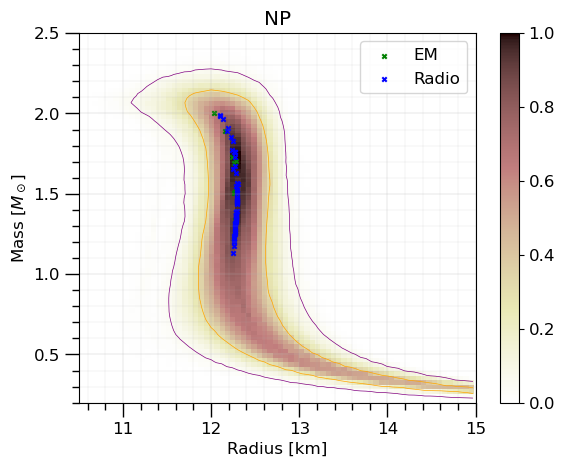

In [12]:
x = np.array(h5py.File('files/mvsr_NP.o2','r')['gm_r_3d/xval'])
y = np.array(h5py.File('files/mvsr_NP.o2','r')['gm_r_3d/yval'])
z = np.array(h5py.File('files/mvsr_NP.o2','r')['gm_r_3d/data/prob']).T
z_n = (z-np.min(z))/(np.max(z)-np.min(z))

plt.imshow(z_n, aspect='auto', origin='lower', interpolation='nearest', \
           extent=(np.min(x), np.max(x), np.min(y), np.max(y)), cmap='pink_r')
plt.colorbar()
X, Y = np.meshgrid(x, y, indexing='ij')
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.68], colors='orange', linewidths=0.5)
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.95], colors='purple', linewidths=0.5)
plt.xlim(10.5, 15.0)
plt.ylim(0.2, 2.5)
plt.xlabel('Radius [km]')
plt.ylabel('Mass [$M_\odot$]')
plt.title('NP')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)

for i in range(0,len(m_src)):
    gm_src  = np.array(mchain['data/'+m_src[i]])
    rd_src  = np.array(mchain['data/'+r_src[i]])
    gm_avg  = np.average(gm_src)
    gm_std  = np.std(gm_src)
    rd_avg  = np.average(rd_src)
    rd_std  = np.std(rd_src)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='green', elinewidth=0.5)
    pt_em = plt.scatter(rd_avg, gm_avg, color='green', marker='x', s=10)

for i in range(0,len(m_nsp)):
    gm_nsp  = np.array(mchain['data/'+m_nsp[i]])
    rd_nsp  = np.interp(gm_nsp, gm, R_avg)
    gm_avg  = np.average(gm_nsp)
    gm_std  = np.std(gm_nsp)
    rd_avg  = np.average(rd_nsp)
    rd_std  = np.std(rd_nsp)
    #plt.errorbar(rd_avg, gm_avg, xerr=[[rd_std], [rd_std]], \
    #             yerr=[[gm_std], [gm_std]], color='blue', elinewidth=0.5)
    pt_rd = plt.scatter(rd_avg, gm_avg, color='blue', marker='x', s=10)

plt.legend([pt_em, pt_rd], ['EM', 'Radio'])
plt.show()

plt.show()

## ML: Mass Distributions

In [13]:
mchain  = h5py.File('files/dist_ML.o2','r')['gm_sn']
mchain2 = h5py.File('files/main_ML.o2','r')['markov_chain_0/data']
mult = np.array(mchain2['mult'])
mmax = np.array(mchain2['M_max'])
gm = np.linspace(0.0, 3.0, 100, dtype=float)
sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

sn_ns_avg = np.average(sn_ns, weights=mult, axis=0)
sn_ns_std = np.std(sn_ns, axis=0)
sn_wd_avg = np.average(sn_wd, weights=mult, axis=0)
sn_wd_std = np.std(sn_wd, axis=0)
sn_lm_avg = np.average(sn_lm, weights=mult, axis=0)
sn_lm_std = np.std(sn_lm, axis=0)

sn_ns_std2 = sn_ns_std
sn_wd_std2 = sn_wd_std
sn_lm_std2 = sn_lm_std

for i in range(len(sn_ns_avg)):
    if sn_ns_avg[i]-sn_ns_std[i] < 0.0:
        sn_ns_std2[i] = sn_ns_avg[i]
    if sn_wd_avg[i]-sn_wd_std[i] < 0.0:
        sn_wd_std2[i] = sn_wd_avg[i]
    if sn_lm_avg[i]-sn_lm_std[i] < 0.0:
        sn_lm_std2[i] = sn_lm_avg[i]

sn_ns_avg.shape

(100,)

In [14]:
nsns = ['M_J0453p','M_J0453c','M_J1906p','M_J1906c','M_B1534p',  'M_B1534c','M_B1913p','M_B1913c',
        'M_B2127p','M_B2127c','M_J0737A','M_J0737B','M_J1756p',  'M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p',  'M_J1829c']
nsns2 = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822',  'M_HerX1',   'M_2S0921']
lmxb2 = ['Mns_6304', 'Mns_6397',   'Mns_M13',   'Mns_M28',   'Mns_M30', 
        'Mns_wCen', 'Mns_X7',     'Mns_1810b', 'Mns_1724b', 'Mns_1702', 
        'Mns_0030', 'Mns_0740']

In [15]:
def f_sn(x, mean, width, skewness):
    cf = 1/np.sqrt(2*np.pi)/width
    pdf = np.exp(-0.5*((x-mean)/width)**2)
    cdf = 1.0+sp.erf((x-mean)*skewness/width/np.sqrt(2.0))
    return cf*pdf*cdf

mchain3 = h5py.File('files/main2_ML.o2','r')['markov_chain_0/data']
mean_ns     = np.array(mchain3['mean_NS'])
width_ns    = np.array(mchain3['width_NS'])
skewness_ns = np.array(mchain3['skewness_NS'])
mean_wd     = np.array(mchain3['mean_WD'])
width_wd    = np.array(mchain3['width_WD'])
skewness_wd = np.array(mchain3['skewness_WD'])
mean_lm     = np.array(mchain3['mean_LM'])
width_lm    = np.array(mchain3['width_LM'])
skewness_lm = np.array(mchain3['skewness_LM'])

mean_ns_avg = np.average(mean_ns, weights=mult)
mean_ns_std = np.std(mean_ns)
width_ns_avg = np.average(width_ns, weights=mult)
width_ns_std = np.std(width_ns)
skewness_ns_avg = np.average(skewness_ns, weights=mult)
skewness_ns_std = np.std(skewness_ns)
mean_wd_avg = np.average(mean_wd, weights=mult)
mean_wd_std = np.std(mean_wd)
width_wd_avg = np.average(width_wd, weights=mult)
width_wd_std = np.std(width_wd)
skewness_wd_avg = np.average(skewness_wd, weights=mult)
skewness_wd_std = np.std(skewness_wd)
mean_lm_avg = np.average(mean_lm, weights=mult)
mean_lm_std = np.std(mean_lm)
width_lm_avg = np.average(width_lm, weights=mult)
width_lm_std = np.std(width_lm)
skewness_lm_avg = np.average(skewness_lm, weights=mult)
skewness_lm_std = np.std(skewness_lm)

print(mean_ns_avg, width_ns_avg, skewness_ns_avg)
print(mean_wd_avg, width_wd_avg, skewness_wd_avg)
print(mean_lm_avg, width_lm_avg, skewness_lm_avg)

1.375229056225122 0.15609314277399974 -0.21847422373629677
1.5528524077515695 0.26064065281719234 0.151275229283019
1.7169079610770595 0.25996670869663696 -0.4434500401874209


In [16]:
delta_ns = skewness_ns_avg/np.sqrt(1.0+skewness_ns_avg**2)
delta_wd = skewness_wd_avg/np.sqrt(1.0+skewness_wd_avg**2)
delta_lm = skewness_lm_avg/np.sqrt(1.0+skewness_lm_avg**2)

ns_mean = mean_ns_avg+width_ns_avg*delta_ns*np.sqrt(2.0/np.pi)
wd_mean = mean_wd_avg+width_wd_avg*delta_wd*np.sqrt(2.0/np.pi)
lm_mean = mean_lm_avg+width_lm_avg*delta_lm*np.sqrt(2.0/np.pi)

ns_std = width_ns_avg*np.sqrt(1.0-2.0*delta_ns**2/np.pi)
wd_std = width_wd_avg*np.sqrt(1.0-2.0*delta_wd**2/np.pi)
lm_std = width_lm_avg*np.sqrt(1.0-2.0*delta_lm**2/np.pi)
#ns_std2 = ns_std
#wd_std2 = wd_std
#lm_std2 = lm_std
#for i in range(len(ns_mean)):
#    if ns_mean[i]-ns_std[i] < 0.0:
#        ns_std2[i] = ns_mean[i]
#    if wd_mean[i]-wd_std[i] < 0.0:
#        wd_std2[i] = wd_mean[i]
#    if lm_mean[i]-lm_std[i] < 0.0:
#        lm_std2[i] = lm_mean[i]

ns_skew = ((4.0-np.pi)/2.0) * (delta_ns*np.sqrt(2.0/np.pi))**3 / (1.0-2.0*delta_ns**2/np.pi)**1.5
wd_skew = ((4.0-np.pi)/2.0) * (delta_wd*np.sqrt(2.0/np.pi))**3 / (1.0-2.0*delta_wd**2/np.pi)**1.5
lm_skew = ((4.0-np.pi)/2.0) * (delta_lm*np.sqrt(2.0/np.pi))**3 / (1.0-2.0*delta_lm**2/np.pi)**1.5

print(ns_mean, ns_std, ns_skew)
print(wd_mean, wd_std, wd_skew)
print(lm_mean, lm_std, lm_skew)


1.3486463496765155 0.15381296737796507 -0.002215553130205803
1.5839578801937697 0.2587778960520386 0.0007454050028105323
1.6328228121941686 0.2459926368164384 -0.0171417437763566


Text(0.5, 0.98, 'ML')

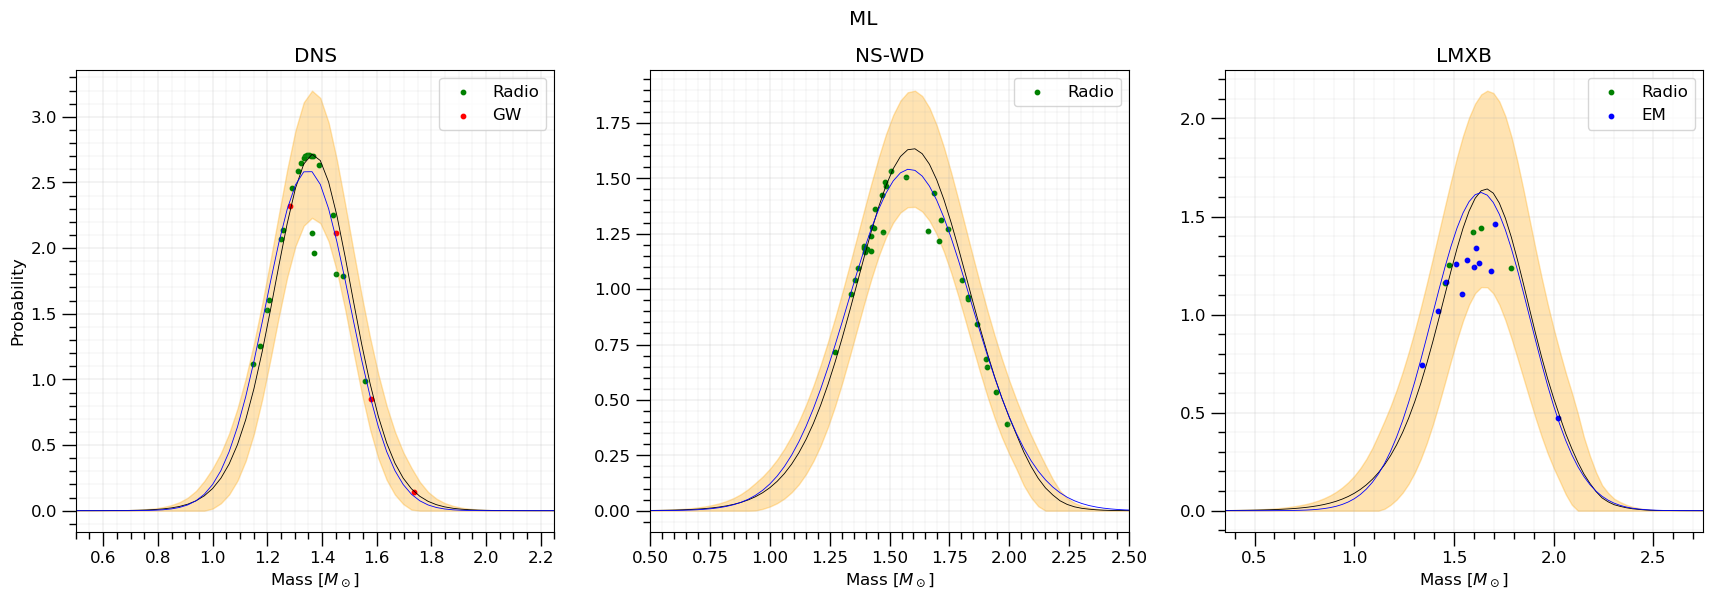

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn_ns_avg, linewidth=0.6, color='black')
#ax[0].plot(gm, sn.pdf(gm, loc=ns_mean, scale=ns_std, a=ns_skew), linewidth=0.6, color='red')
ax[0].plot(gm, sn.pdf(gm, loc=mean_ns_avg, scale=width_ns_avg, a=skewness_ns_avg), linewidth=0.6, color='blue')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn_wd_avg, linewidth=0.6, color='black')
#ax[1].plot(gm, sn.pdf(gm, loc=wd_mean, scale=wd_std, a=wd_skew), linewidth=0.6, color='red')
ax[1].plot(gm, sn.pdf(gm, loc=mean_wd_avg, scale=width_wd_avg, a=skewness_wd_avg), linewidth=0.6, color='blue')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn_lm_avg, linewidth=0.6, color='black')
#ax[2].plot(gm, sn.pdf(gm, loc=lm_mean, scale=lm_std, a=lm_skew), linewidth=0.6, color='red')
ax[2].plot(gm, sn.pdf(gm, loc=mean_lm_avg, scale=width_lm_avg, a=skewness_lm_avg), linewidth=0.6, color='blue')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('files/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('files/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('files/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_wd, width_wd, skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('files/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('files/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_\odot$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')
fig.suptitle('ML')

Suppose NS mass $M \in [0.2, 3.0]~M_\odot$ has a grid of 100 intervals. Denote each mass value by $M_i$. Then compute $SN_i=SN(M_i, \mu, \sigma, \alpha)$ and average$(SN_i)$

Text(0.5, 0.98, 'ML')

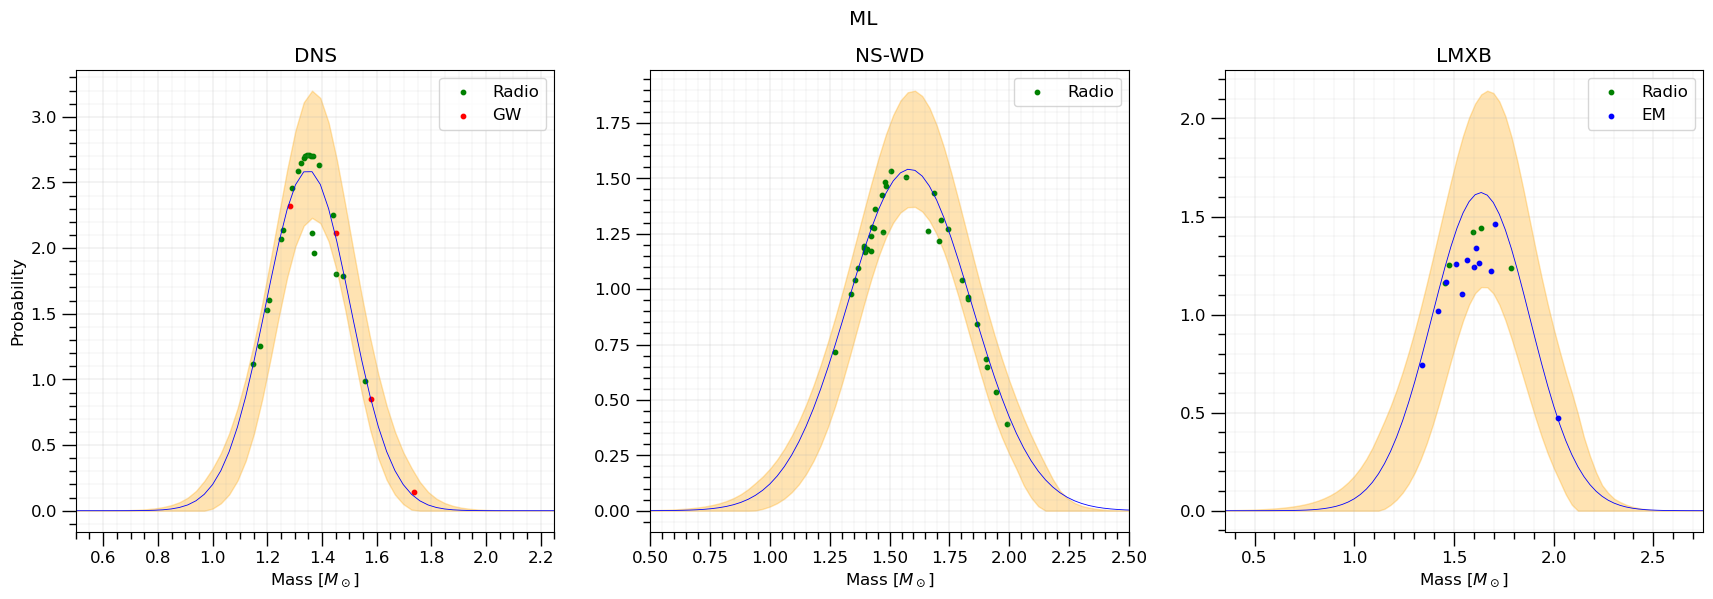

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn.pdf(gm, loc=mean_ns_avg, scale=width_ns_avg, a=skewness_ns_avg), linewidth=0.6, color='blue')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn.pdf(gm, loc=mean_wd_avg, scale=width_wd_avg, a=skewness_wd_avg), linewidth=0.6, color='blue')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn.pdf(gm, loc=mean_lm_avg, scale=width_lm_avg, a=skewness_lm_avg), linewidth=0.6, color='blue')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('files/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = sn.pdf(x, loc=mean_ns, scale=width_ns, a=skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('files/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = sn.pdf(x, loc=mean_ns, scale=width_ns, a=skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('files/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = sn.pdf(x, loc=mean_wd, scale=width_wd, a=skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('files/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = sn.pdf(x, loc=mean_lm, scale=width_lm, a=skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('files/main_ML.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = sn.pdf(x, loc=mean_lm, scale=width_lm, a=skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_\odot$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')
fig.suptitle('ML')

In [19]:
sn.interval(0.68, loc=mean_ns_avg, scale=width_ns_avg, a=skewness_ns_avg)

(1.1956896456325068, 1.5016042903430067)

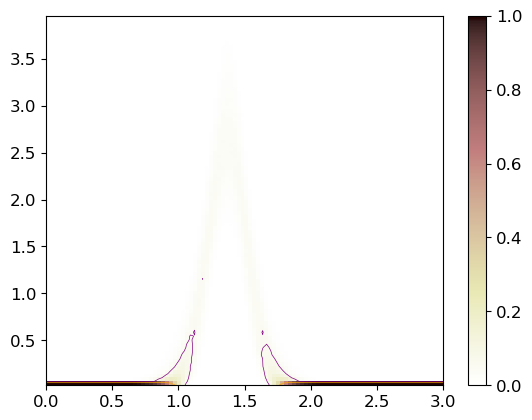

In [25]:
x = np.array(h5py.File('files/dist_ML.o2','r')['sn_ns/xval'])
y = np.array(h5py.File('files/dist_ML.o2','r')['sn_ns/yval'])
z = np.array(h5py.File('files/dist_ML.o2','r')['sn_ns/data/prob_ns']).T
z_n = (z-np.min(z))/(np.max(z)-np.min(z))

plt.imshow(z_n, aspect='auto', origin='lower', interpolation='nearest', \
           extent=(np.min(x), np.max(x), np.min(y), np.max(y)), cmap='pink_r')
plt.colorbar()
X, Y = np.meshgrid(x, y, indexing='ij')
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.68], colors='orange', linewidths=0.5)
plt.contour(X.T, Y.T, z_n, levels=[1.0-0.95], colors='purple', linewidths=0.5)
plt.show()

## MP: Mass Distribution

1.3861295132999734 0.1540589257537407 -0.21617626587822547
1.567340798448854 0.26232049869837737 0.07031335231457486
1.6948686313480028 0.2489002722280382 -0.26179700315588766


Text(0.5, 1.0, 'LMXB')

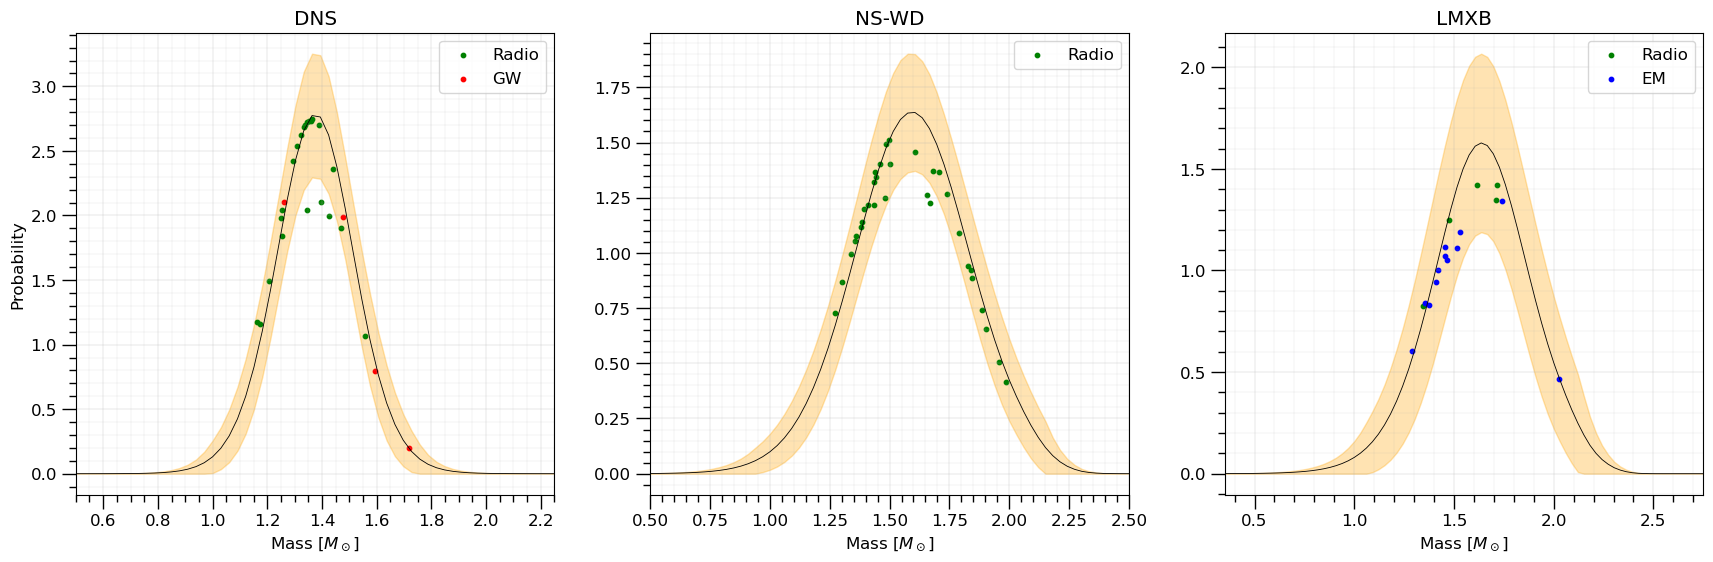

In [21]:
mchain  = h5py.File('files/dist_MP.o2','r')['gm_sn']
mchain2 = h5py.File('files/main_MP.o2','r')['markov_chain_0/data']
mult = np.array(mchain2['mult'])
mmax = np.array(mchain2['M_max'])
gm = np.linspace(0.0, 3.0, 100, dtype=float)
sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

sn_ns_avg = np.average(sn_ns, axis=0)
sn_ns_std = np.std(sn_ns, axis=0)
sn_wd_avg = np.average(sn_wd, axis=0)
sn_wd_std = np.std(sn_wd, axis=0)
sn_lm_avg = np.average(sn_lm, axis=0)
sn_lm_std = np.std(sn_lm, axis=0)

sn_ns_std2 = sn_ns_std
sn_wd_std2 = sn_wd_std
sn_lm_std2 = sn_lm_std

for i in range(len(sn_ns_avg)):
    if sn_ns_avg[i]-sn_ns_std[i] < 0.0:
        sn_ns_std2[i] = sn_ns_avg[i]
    if sn_wd_avg[i]-sn_wd_std[i] < 0.0:
        sn_wd_std2[i] = sn_wd_avg[i]
    if sn_lm_avg[i]-sn_lm_std[i] < 0.0:
        sn_lm_std2[i] = sn_lm_avg[i]

nsns = ['M_J0453p','M_J0453c','M_J1906p','M_J1906c','M_B1534p',  'M_B1534c','M_B1913p','M_B1913c',
        'M_B2127p','M_B2127c','M_J0737A','M_J0737B','M_J1756p',  'M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p',  'M_J1829c']
nsns2 = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822',  'M_HerX1',   'M_2S0921']
lmxb2 = ['Mns_6304', 'Mns_6397',   'Mns_M13',   'Mns_M28',   'Mns_M30', 
        'Mns_wCen', 'Mns_X7',     'Mns_1810b', 'Mns_1724b', 'Mns_1702', 
        'Mns_0030', 'Mns_0740']

def f_sn(x, mean, width, skewness):
    cf = 1/np.sqrt(2*np.pi)/width
    pdf = np.exp(-0.5*((x-mean)/width)**2)
    cdf = 1.0+sp.erf((x-mean)*skewness/width/np.sqrt(2.0))
    return cf*pdf*cdf

mchain3 = h5py.File('files/main2_MP.o2','r')['markov_chain_0/data']
mean_ns     = np.array(mchain3['mean_NS'])
width_ns    = np.array(mchain3['width_NS'])
skewness_ns = np.array(mchain3['skewness_NS'])
mean_wd     = np.array(mchain3['mean_WD'])
width_wd    = np.array(mchain3['width_WD'])
skewness_wd = np.array(mchain3['skewness_WD'])
mean_lm     = np.array(mchain3['mean_LM'])
width_lm    = np.array(mchain3['width_LM'])
skewness_lm = np.array(mchain3['skewness_LM'])

mean_ns_avg = np.average(mean_ns, weights=mult)
mean_ns_std = np.std(mean_ns)
width_ns_avg = np.average(width_ns, weights=mult)
width_ns_std = np.std(width_ns)
skewness_ns_avg = np.average(skewness_ns, weights=mult)
skewness_ns_std = np.std(skewness_ns)
mean_wd_avg = np.average(mean_wd, weights=mult)
mean_wd_std = np.std(mean_wd)
width_wd_avg = np.average(width_wd, weights=mult)
width_wd_std = np.std(width_wd)
skewness_wd_avg = np.average(skewness_wd, weights=mult)
skewness_wd_std = np.std(skewness_wd)
mean_lm_avg = np.average(mean_lm, weights=mult)
mean_lm_std = np.std(mean_lm)
width_lm_avg = np.average(width_lm, weights=mult)
width_lm_std = np.std(width_lm)
skewness_lm_avg = np.average(skewness_lm, weights=mult)
skewness_lm_std = np.std(skewness_lm)

print(mean_ns_avg, width_ns_avg, skewness_ns_avg)
print(mean_wd_avg, width_wd_avg, skewness_wd_avg)
print(mean_lm_avg, width_lm_avg, skewness_lm_avg)

fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn_ns_avg, linewidth=0.6, color='black')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn_wd_avg, linewidth=0.6, color='black')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn_lm_avg, linewidth=0.6, color='black')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('files/main_MP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('files/main_MP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('files/main_MP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_wd, width_wd, skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('files/main_MP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('files/main_MP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_\odot$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')

## NL: Mass Distribution

1.386859424983812 0.1569510844514635 -0.3072912958194414
1.5557980393114932 0.2508168044523481 0.17225120203602834
1.7206683475153284 0.2579966180894692 -0.48947666958174685


Text(0.5, 1.0, 'LMXB')

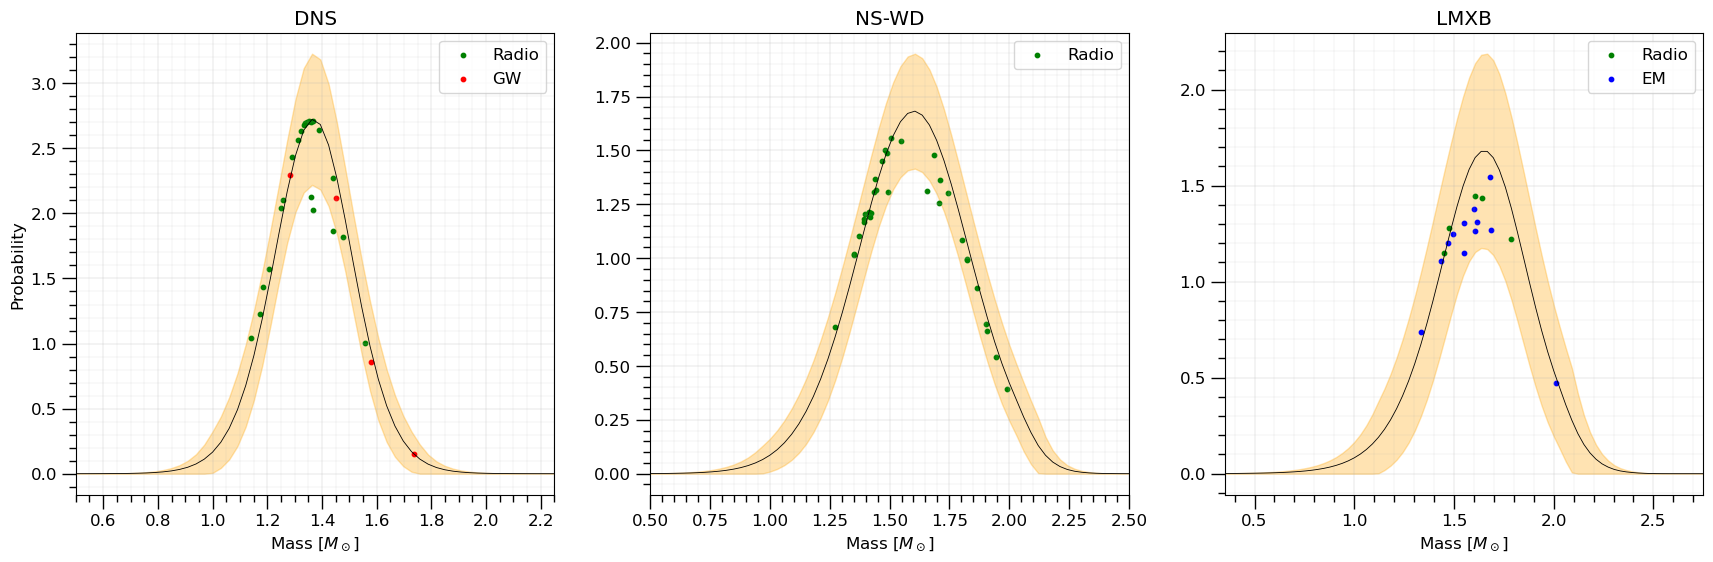

In [22]:
mchain  = h5py.File('files/dist_NL.o2','r')['gm_sn']
mchain2 = h5py.File('files/main_NL.o2','r')['markov_chain_0/data']
mult = np.array(mchain2['mult'])
mmax = np.array(mchain2['M_max'])
gm = np.linspace(0.0, 3.0, 100, dtype=float)
sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

sn_ns_avg = np.average(sn_ns, axis=0)
sn_ns_std = np.std(sn_ns, axis=0)
sn_wd_avg = np.average(sn_wd, axis=0)
sn_wd_std = np.std(sn_wd, axis=0)
sn_lm_avg = np.average(sn_lm, axis=0)
sn_lm_std = np.std(sn_lm, axis=0)

sn_ns_std2 = sn_ns_std
sn_wd_std2 = sn_wd_std
sn_lm_std2 = sn_lm_std

for i in range(len(sn_ns_avg)):
    if sn_ns_avg[i]-sn_ns_std[i] < 0.0:
        sn_ns_std2[i] = sn_ns_avg[i]
    if sn_wd_avg[i]-sn_wd_std[i] < 0.0:
        sn_wd_std2[i] = sn_wd_avg[i]
    if sn_lm_avg[i]-sn_lm_std[i] < 0.0:
        sn_lm_std2[i] = sn_lm_avg[i]

nsns = ['M_J0453p','M_J0453c','M_J1906p','M_J1906c','M_B1534p',  'M_B1534c','M_B1913p','M_B1913c',
        'M_B2127p','M_B2127c','M_J0737A','M_J0737B','M_J1756p',  'M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p',  'M_J1829c']
nsns2 = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822',  'M_HerX1',   'M_2S0921']
lmxb2 = ['Mns_6304', 'Mns_6397',   'Mns_M13',   'Mns_M28',   'Mns_M30', 
        'Mns_wCen', 'Mns_X7',     'Mns_1810b', 'Mns_1724b', 'Mns_1702', 
        'Mns_0030', 'Mns_0740']

def f_sn(x, mean, width, skewness):
    cf = 1/np.sqrt(2*np.pi)/width
    pdf = np.exp(-0.5*((x-mean)/width)**2)
    cdf = 1.0+sp.erf((x-mean)*skewness/width/np.sqrt(2.0))
    return cf*pdf*cdf

mchain3 = h5py.File('files/main2_NL.o2','r')['markov_chain_0/data']
mean_ns     = np.array(mchain3['mean_NS'])
width_ns    = np.array(mchain3['width_NS'])
skewness_ns = np.array(mchain3['skewness_NS'])
mean_wd     = np.array(mchain3['mean_WD'])
width_wd    = np.array(mchain3['width_WD'])
skewness_wd = np.array(mchain3['skewness_WD'])
mean_lm     = np.array(mchain3['mean_LM'])
width_lm    = np.array(mchain3['width_LM'])
skewness_lm = np.array(mchain3['skewness_LM'])

mean_ns_avg = np.average(mean_ns, weights=mult)
mean_ns_std = np.std(mean_ns)
width_ns_avg = np.average(width_ns, weights=mult)
width_ns_std = np.std(width_ns)
skewness_ns_avg = np.average(skewness_ns, weights=mult)
skewness_ns_std = np.std(skewness_ns)
mean_wd_avg = np.average(mean_wd, weights=mult)
mean_wd_std = np.std(mean_wd)
width_wd_avg = np.average(width_wd, weights=mult)
width_wd_std = np.std(width_wd)
skewness_wd_avg = np.average(skewness_wd, weights=mult)
skewness_wd_std = np.std(skewness_wd)
mean_lm_avg = np.average(mean_lm, weights=mult)
mean_lm_std = np.std(mean_lm)
width_lm_avg = np.average(width_lm, weights=mult)
width_lm_std = np.std(width_lm)
skewness_lm_avg = np.average(skewness_lm, weights=mult)
skewness_lm_std = np.std(skewness_lm)

print(mean_ns_avg, width_ns_avg, skewness_ns_avg)
print(mean_wd_avg, width_wd_avg, skewness_wd_avg)
print(mean_lm_avg, width_lm_avg, skewness_lm_avg)

fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn_ns_avg, linewidth=0.6, color='black')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn_wd_avg, linewidth=0.6, color='black')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn_lm_avg, linewidth=0.6, color='black')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('files/main_NL.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('files/main_NL.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('files/main_NL.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_wd, width_wd, skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('files/main_NL.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('files/main_NL.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_\odot$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')

## NP: Mass Distributions

1.3378148905526095 0.1680840562041228 0.1877692218470669
1.5028273419985907 0.28590515628697294 0.28908519193394244
1.5704299369802075 0.29484478941529824 0.19796121149373036


Text(0.5, 1.0, 'LMXB')

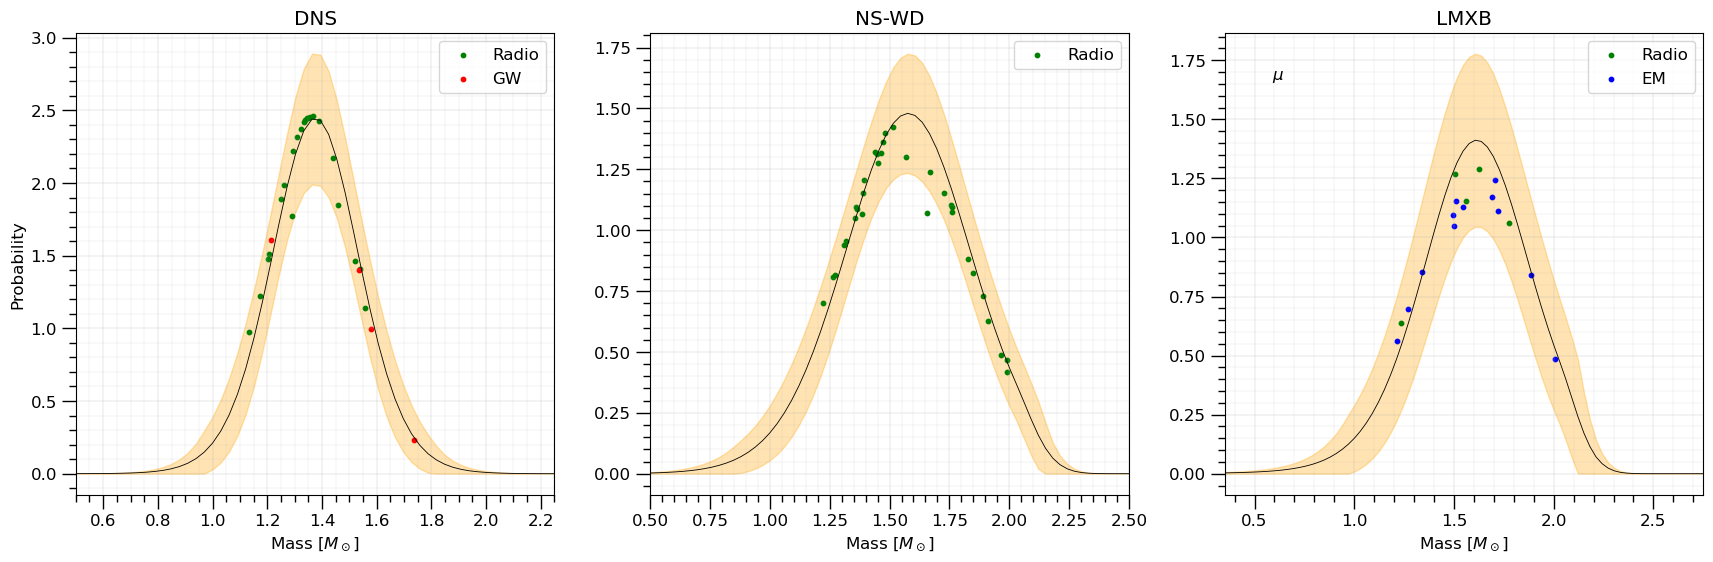

In [23]:
mchain  = h5py.File('files/dist_NP.o2','r')['gm_sn']
mchain2 = h5py.File('files/main_NP.o2','r')['markov_chain_0/data']
mult = np.array(mchain2['mult'])
mmax = np.array(mchain2['M_max'])
gm = np.linspace(0.0, 3.0, 100, dtype=float)
sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

sn_ns_avg = np.average(sn_ns, axis=0)
sn_ns_std = np.std(sn_ns, axis=0)
sn_wd_avg = np.average(sn_wd, axis=0)
sn_wd_std = np.std(sn_wd, axis=0)
sn_lm_avg = np.average(sn_lm, axis=0)
sn_lm_std = np.std(sn_lm, axis=0)

sn_ns_std2 = sn_ns_std
sn_wd_std2 = sn_wd_std
sn_lm_std2 = sn_lm_std

for i in range(len(sn_ns_avg)):
    if sn_ns_avg[i]-sn_ns_std[i] < 0.0:
        sn_ns_std2[i] = sn_ns_avg[i]
    if sn_wd_avg[i]-sn_wd_std[i] < 0.0:
        sn_wd_std2[i] = sn_wd_avg[i]
    if sn_lm_avg[i]-sn_lm_std[i] < 0.0:
        sn_lm_std2[i] = sn_lm_avg[i]

nsns = ['M_J0453p','M_J0453c','M_J1906p','M_J1906c','M_B1534p',  'M_B1534c','M_B1913p','M_B1913c',
        'M_B2127p','M_B2127c','M_J0737A','M_J0737B','M_J1756p',  'M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p',  'M_J1829c']
nsns2 = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822',  'M_HerX1',   'M_2S0921']
lmxb2 = ['Mns_6304', 'Mns_6397',   'Mns_M13',   'Mns_M28',   'Mns_M30', 
        'Mns_wCen', 'Mns_X7',     'Mns_1810b', 'Mns_1724b', 'Mns_1702', 
        'Mns_0030', 'Mns_0740']

def f_sn(x, mean, width, skewness):
    cf = 1/np.sqrt(2*np.pi)/width
    pdf = np.exp(-0.5*((x-mean)/width)**2)
    cdf = 1.0+sp.erf((x-mean)*skewness/width/np.sqrt(2.0))
    return cf*pdf*cdf

mchain3 = h5py.File('files/main2_NP.o2','r')['markov_chain_0/data']
mean_ns     = np.array(mchain3['mean_NS'])
width_ns    = np.array(mchain3['width_NS'])
skewness_ns = np.array(mchain3['skewness_NS'])
mean_wd     = np.array(mchain3['mean_WD'])
width_wd    = np.array(mchain3['width_WD'])
skewness_wd = np.array(mchain3['skewness_WD'])
mean_lm     = np.array(mchain3['mean_LM'])
width_lm    = np.array(mchain3['width_LM'])
skewness_lm = np.array(mchain3['skewness_LM'])

mean_ns_avg = np.average(mean_ns, weights=mult)
mean_ns_std = np.std(mean_ns)
width_ns_avg = np.average(width_ns, weights=mult)
width_ns_std = np.std(width_ns)
skewness_ns_avg = np.average(skewness_ns, weights=mult)
skewness_ns_std = np.std(skewness_ns)
mean_wd_avg = np.average(mean_wd, weights=mult)
mean_wd_std = np.std(mean_wd)
width_wd_avg = np.average(width_wd, weights=mult)
width_wd_std = np.std(width_wd)
skewness_wd_avg = np.average(skewness_wd, weights=mult)
skewness_wd_std = np.std(skewness_wd)
mean_lm_avg = np.average(mean_lm, weights=mult)
mean_lm_std = np.std(mean_lm)
width_lm_avg = np.average(width_lm, weights=mult)
width_lm_std = np.std(width_lm)
skewness_lm_avg = np.average(skewness_lm, weights=mult)
skewness_lm_std = np.std(skewness_lm)

print(mean_ns_avg, width_ns_avg, skewness_ns_avg)
print(mean_wd_avg, width_wd_avg, skewness_wd_avg)
print(mean_lm_avg, width_lm_avg, skewness_lm_avg)

fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn_ns_avg, linewidth=0.6, color='black')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn_wd_avg, linewidth=0.6, color='black')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn_lm_avg, linewidth=0.6, color='black')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_wd, width_wd, skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_\odot$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].text(0.1, 0.9, '$\mu$', fontsize=12, color='black', transform=ax[2].transAxes)
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')

# Mass Distributions

1.3378148905526095 0.1680840562041228 0.1877692218470669
1.5028273419985907 0.28590515628697294 0.28908519193394244
1.5704299369802075 0.29484478941529824 0.19796121149373036


Text(0.5, 1.0, 'LMXB')

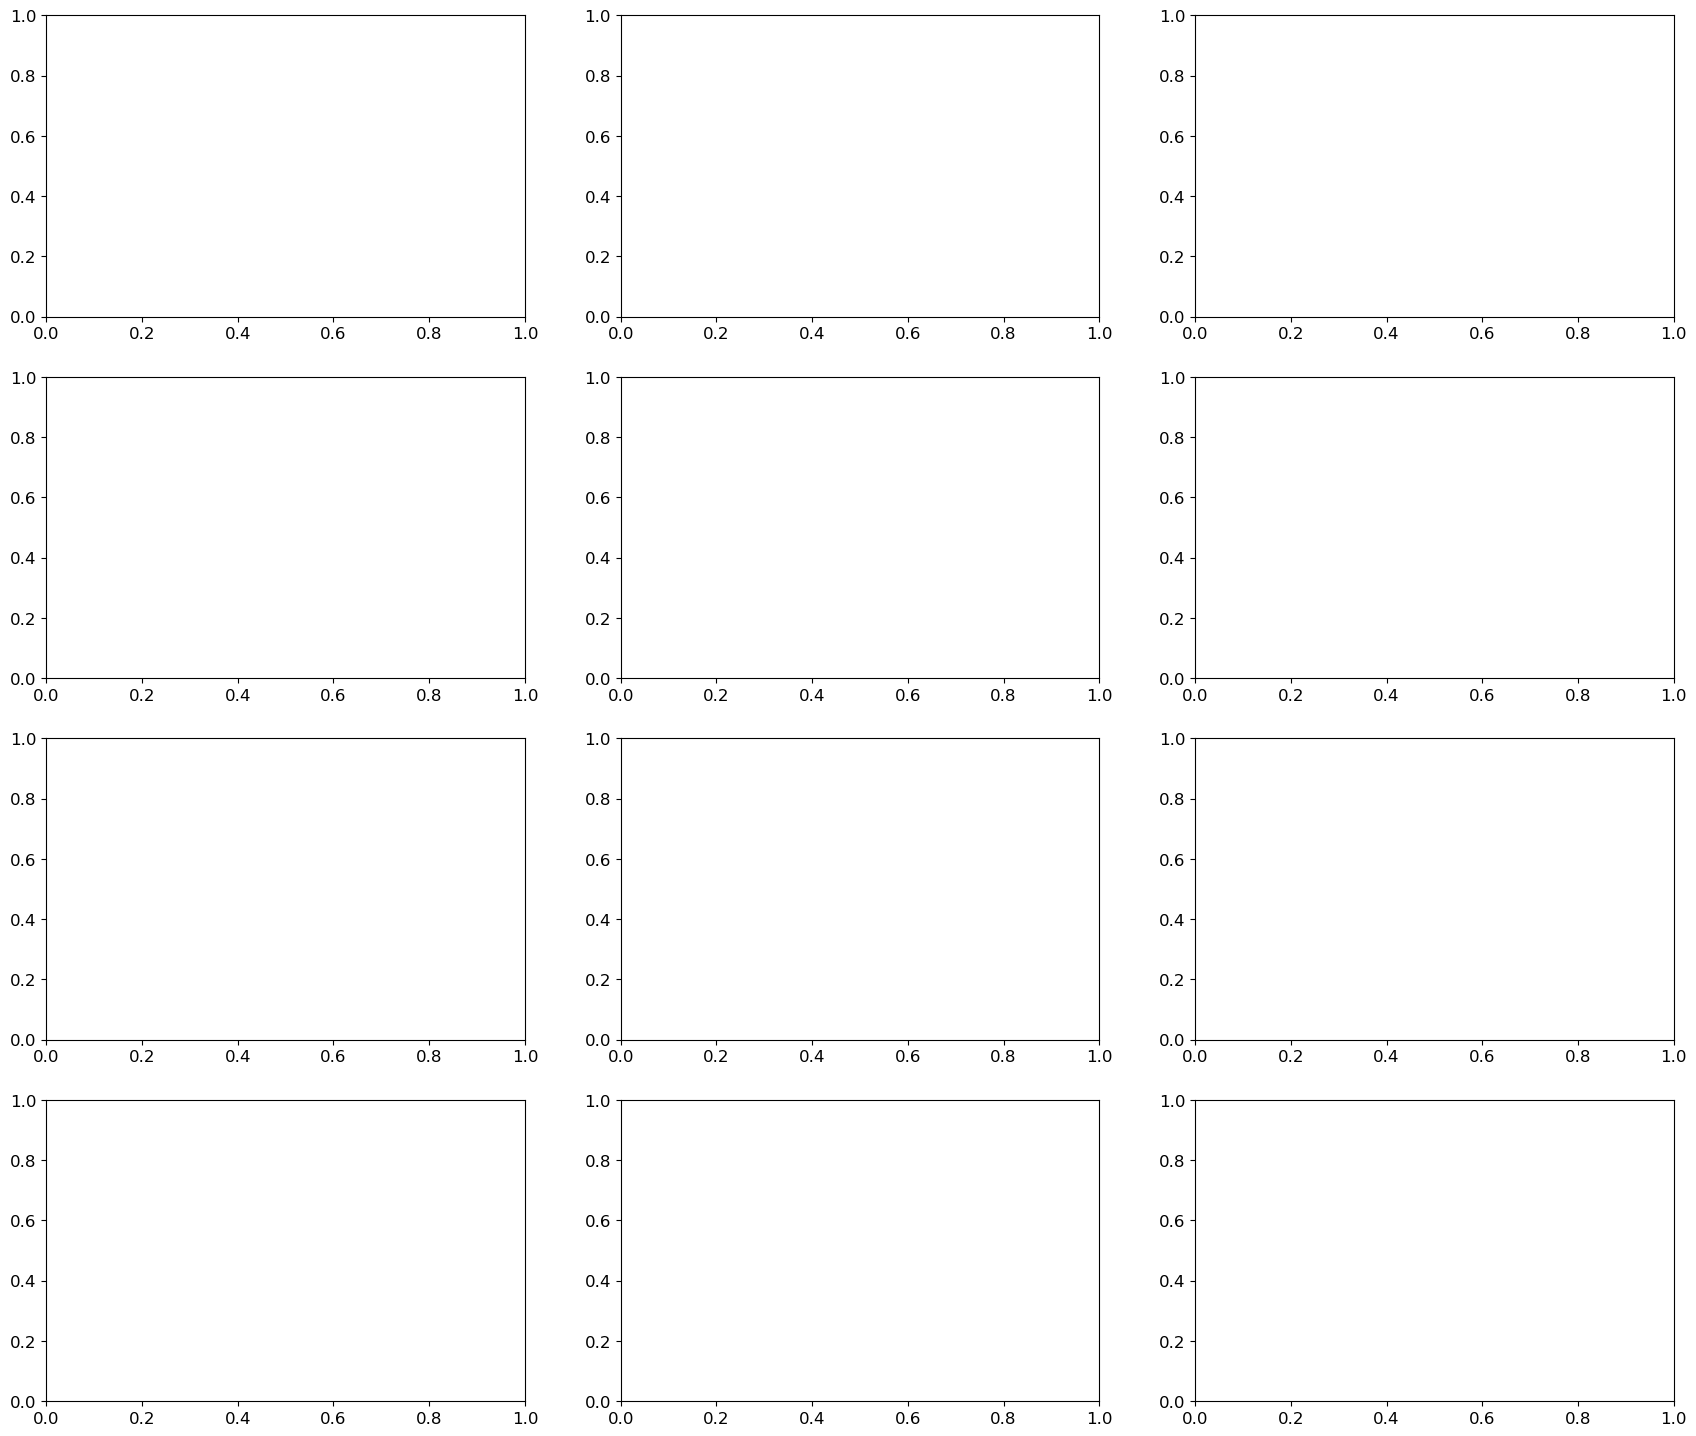

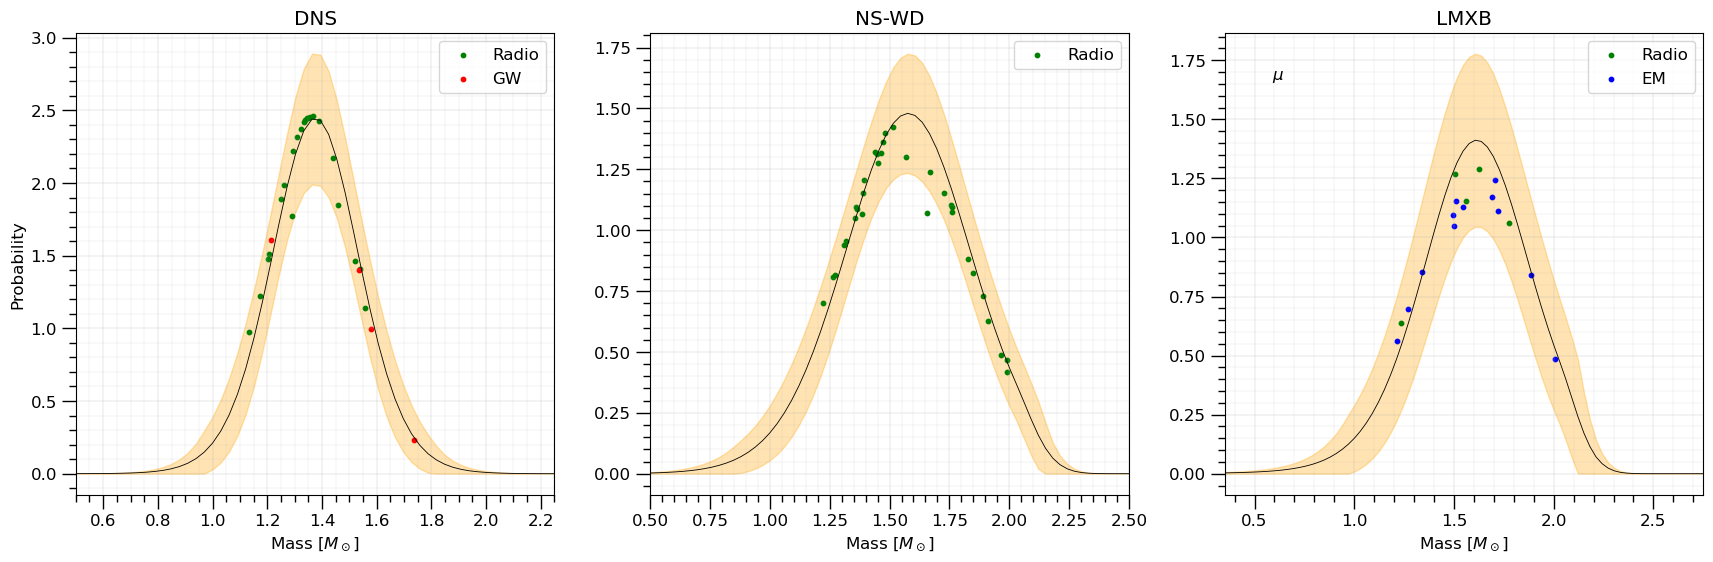

In [24]:
model = ['ML', 'MP', 'NL', 'NP']

nsns = ['M_J0453p','M_J0453c','M_J1906p','M_J1906c','M_B1534p',  'M_B1534c','M_B1913p','M_B1913c',
        'M_B2127p','M_B2127c','M_J0737A','M_J0737B','M_J1756p',  'M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p',  'M_J1829c']
nsns2 = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822',  'M_HerX1',   'M_2S0921']
lmxb2 = ['Mns_6304', 'Mns_6397',   'Mns_M13',   'Mns_M28',   'Mns_M30', 
        'Mns_wCen', 'Mns_X7',     'Mns_1810b', 'Mns_1724b', 'Mns_1702', 
        'Mns_0030', 'Mns_0740']

fig, ax = plt.subplots(4, 3, figsize=(21,18))

for i in range(4):
    mchain  = h5py.File(f'files/dist_{model[i]}.o2','r')['gm_sn']
    mchain2 = h5py.File(f'files/main_{model[i]}.o2','r')['markov_chain_0/data']
    mchain3 = h5py.File(f'files/main2_{model[i]}.o2','r')['markov_chain_0/data']
    mult = np.array(mchain2['mult'])
    mmax = np.array(mchain2['M_max'])
    gm = np.linspace(0.0, 3.0, 100, dtype=float)
    sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
    sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
    sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

    sn_ns_avg = np.average(sn_ns, axis=0)
    sn_ns_std = np.std(sn_ns, axis=0)
    sn_wd_avg = np.average(sn_wd, axis=0)
    sn_wd_std = np.std(sn_wd, axis=0)
    sn_lm_avg = np.average(sn_lm, axis=0)
    sn_lm_std = np.std(sn_lm, axis=0)

    sn_ns_std2 = sn_ns_std
    sn_wd_std2 = sn_wd_std
    sn_lm_std2 = sn_lm_std

    for j in range(len(sn_ns_avg)):
        if sn_ns_avg[j]-sn_ns_std[j] < 0.0:
            sn_ns_std2[j] = sn_ns_avg[j]
        if sn_wd_avg[j]-sn_wd_std[j] < 0.0:
            sn_wd_std2[j] = sn_wd_avg[j]
        if sn_lm_avg[j]-sn_lm_std[j] < 0.0:
            sn_lm_std2[j] = sn_lm_avg[j]

    

mchain  = h5py.File('files/dist_NP.o2','r')['gm_sn']
mchain2 = h5py.File('files/main_NP.o2','r')['markov_chain_0/data']
mchain3 = h5py.File('files/main2_NP.o2','r')['markov_chain_0/data']
mult = np.array(mchain2['mult'])
mmax = np.array(mchain2['M_max'])
gm = np.linspace(0.0, 3.0, 100, dtype=float)
sn_ns = np.array([mchain[f'data/SN_NS_{i}'][:] for i in range(100)]).T
sn_wd = np.array([mchain[f'data/SN_WD_{i}'][:] for i in range(100)]).T
sn_lm = np.array([mchain[f'data/SN_LM_{i}'][:] for i in range(100)]).T

sn_ns_avg = np.average(sn_ns, axis=0)
sn_ns_std = np.std(sn_ns, axis=0)
sn_wd_avg = np.average(sn_wd, axis=0)
sn_wd_std = np.std(sn_wd, axis=0)
sn_lm_avg = np.average(sn_lm, axis=0)
sn_lm_std = np.std(sn_lm, axis=0)

sn_ns_std2 = sn_ns_std
sn_wd_std2 = sn_wd_std
sn_lm_std2 = sn_lm_std

for i in range(len(sn_ns_avg)):
    if sn_ns_avg[i]-sn_ns_std[i] < 0.0:
        sn_ns_std2[i] = sn_ns_avg[i]
    if sn_wd_avg[i]-sn_wd_std[i] < 0.0:
        sn_wd_std2[i] = sn_wd_avg[i]
    if sn_lm_avg[i]-sn_lm_std[i] < 0.0:
        sn_lm_std2[i] = sn_lm_avg[i]

def f_sn(x, mean, width, skewness):
    cf = 1/np.sqrt(2*np.pi)/width
    pdf = np.exp(-0.5*((x-mean)/width)**2)
    cdf = 1.0+sp.erf((x-mean)*skewness/width/np.sqrt(2.0))
    return cf*pdf*cdf

mean_ns     = np.array(mchain3['mean_NS'])
width_ns    = np.array(mchain3['width_NS'])
skewness_ns = np.array(mchain3['skewness_NS'])
mean_wd     = np.array(mchain3['mean_WD'])
width_wd    = np.array(mchain3['width_WD'])
skewness_wd = np.array(mchain3['skewness_WD'])
mean_lm     = np.array(mchain3['mean_LM'])
width_lm    = np.array(mchain3['width_LM'])
skewness_lm = np.array(mchain3['skewness_LM'])

mean_ns_avg = np.average(mean_ns, weights=mult)
mean_ns_std = np.std(mean_ns)
width_ns_avg = np.average(width_ns, weights=mult)
width_ns_std = np.std(width_ns)
skewness_ns_avg = np.average(skewness_ns, weights=mult)
skewness_ns_std = np.std(skewness_ns)
mean_wd_avg = np.average(mean_wd, weights=mult)
mean_wd_std = np.std(mean_wd)
width_wd_avg = np.average(width_wd, weights=mult)
width_wd_std = np.std(width_wd)
skewness_wd_avg = np.average(skewness_wd, weights=mult)
skewness_wd_std = np.std(skewness_wd)
mean_lm_avg = np.average(mean_lm, weights=mult)
mean_lm_std = np.std(mean_lm)
width_lm_avg = np.average(width_lm, weights=mult)
width_lm_std = np.std(width_lm)
skewness_lm_avg = np.average(skewness_lm, weights=mult)
skewness_lm_std = np.std(skewness_lm)

print(mean_ns_avg, width_ns_avg, skewness_ns_avg)
print(mean_wd_avg, width_wd_avg, skewness_wd_avg)
print(mean_lm_avg, width_lm_avg, skewness_lm_avg)

fig, ax = plt.subplots(1, 3, figsize=(21,6))

ax[0].plot(gm, sn_ns_avg, linewidth=0.6, color='black')
ax[0].fill_between(gm, sn_ns_avg-sn_ns_std2, sn_ns_avg+sn_ns_std, color='orange', alpha=0.3)
ax[1].plot(gm, sn_wd_avg, linewidth=0.6, color='black')
ax[1].fill_between(gm, sn_wd_avg-sn_wd_std2, sn_wd_avg+sn_wd_std, color='orange', alpha=0.3)
ax[2].plot(gm, sn_lm_avg, linewidth=0.6, color='black')
ax[2].fill_between(gm, sn_lm_avg-sn_lm_std2, sn_lm_avg+sn_lm_std, color='orange', alpha=0.3)

for i in range(0,len(nsns)):
    mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_ns = ax[0].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(nsns2)):
    mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nsns2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_ns, width_ns, skewness_ns)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_gw = ax[0].scatter(x_avg, y_avg, color='red', marker='o', s=10)

for i in range(0,len(nswd)):
    mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+nswd[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_wd, width_wd, skewness_wd)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_wd = ax[1].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb)):
    mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_lm = ax[2].scatter(x_avg, y_avg, color='green', marker='o', s=10)

for i in range(0,len(lmxb2)):
    mchain = h5py.File('files/main_NP.o2','r')['markov_chain_0']
    x = np.array(mchain['data/'+lmxb2[i]])
    x_avg = np.average(x, axis=0, weights=mult)
    x_std = np.std(x)
    y = f_sn(x, mean_lm, width_lm, skewness_lm)
    y_avg = np.average(y, axis=0, weights=mult)
    y_std = np.std(y)
    pt_em = ax[2].scatter(x_avg, y_avg, color='blue', marker='o', s=10)

for i in range(3):
    ax[i].set_xlabel('Mass [$M_\odot$]')
    ax[i].set_xlim(0.0, 3.0)
    ax[i].minorticks_on()
    ax[i].tick_params('both', length=10, width=1, which='major')
    ax[i].tick_params('both', length=5,  width=1, which='minor')
    ax[i].grid(which='major', linewidth=0.2, visible=True)
    ax[i].grid(which='minor', linewidth=0.1, visible=True)

ax[0].legend([pt_ns, pt_gw], ['Radio', 'GW'])
ax[0].set_xlim(0.5, 2.25)
ax[0].set_ylabel('Probability')
ax[0].set_title('DNS')
ax[1].legend([pt_wd], ['Radio'])
ax[1].set_xlim(0.5, 2.5)
ax[1].set_title('NS-WD')
ax[2].legend([pt_lm, pt_em], ['Radio', 'EM'])
ax[2].text(0.1, 0.9, '$\mu$', fontsize=12, color='black', transform=ax[2].transAxes)
ax[2].set_xlim(0.35, 2.75)
ax[2].set_title('LMXB')